In [49]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

https://www.kaggle.com/code/rafjaa/dealing-with-very-small-datasets#t1

https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

# load the data

In [50]:
os.listdir()

['.ipynb_checkpoints',
 '10cc_FL_to_cell_numbers.ipynb',
 '10CC_reference_to_model.ipynb',
 '10CC_reference_to_model_per_strain_full.ipynb',
 '10CC_reference_to_model_per_strain_shuffle.ipynb',
 '10CC_reference_to_model_test_train.ipynb',
 'data',
 'model_store_compare_RMSE_model.ipynb',
 'monte_predicted_classes.csv.gz',
 'reference_10cc.xlsx',
 'reference_10cc_all.xlsx',
 'reference_10cc_axenic.xlsx',
 'reference_ccpa.xlsx',
 'reference_final.xlsx',
 'reference_pro99_axenic.xlsx',
 'reference_yara_axenic.xlsx']

In [51]:
refdf_10cc = pd.read_excel('reference_10cc_all.xlsx')
refdf_ccpa = pd.read_excel('reference_ccpa.xlsx')
refdf_yara = pd.read_excel('reference_yara_axenic.xlsx')


In [52]:
#refdf_yara = refdf_yara.loc[~refdf_yara.strain.isin(['ctrl'])].copy()

In [53]:
refdf_yara.Group.value_counts()

Axenic_Other    15363
Axenic            681
Name: Group, dtype: int64

In [54]:
refdf_10cc['Experiment'] = '10CC'
refdf_ccpa['Experiment'] = '5x5'
refdf_yara['Experiment'] = 'Axenic_media'


In [55]:
refdf_ccpa[['Group', 'id','full name',  ]].value_counts()
#[~refdf_ccpa['train_Group'].isin(['Other'])]

Group         id              full name             
Strong_Other  MIT0604_DE1     A. mediterranea AltDE1    1338
Strong        MED4_DE1        A. mediterranea AltDE1    1338
Strong_Other  Natl2A_BS11     A. macleodii BS11         1338
              Natl2A_ATCC     A. macleodii ATCC27126    1338
              Natl2A_1A3      A. macleodii HOT1A3       1338
              MIT9313_DE1     A. mediterranea AltDE1    1338
              MIT9312_DE      A. mediterranea AltDE     1338
              MIT9312_1A3     A. macleodii HOT1A3       1338
              MIT0604_DE      A. mediterranea AltDE     1338
              MIT0604_1A3     A. macleodii HOT1A3       1338
              Natl2A_DE1      A. mediterranea AltDE1    1338
Strong        MED4_DE         A. mediterranea AltDE     1338
Other         all_all         Axenic                    1338
Strong_Other  MIT9313_DE      A. mediterranea AltDE     1284
              MIT9313_BS11    A. macleodii BS11         1284
              MIT9312_DE1     A.

In [56]:
refdf_ccpa.groupby('transfer').day.max()

transfer
0    140.708333
2     39.870000
3    140.930000
4    140.900000
5    120.900000
6    122.760000
7    122.750000
Name: day, dtype: float64

In [57]:
refdf_10cc.groupby('transfer').day.max()

transfer
0    128.767361
1     59.980556
2    119.040972
3    100.952083
4     79.987500
5     64.945139
Name: day, dtype: float64

In [58]:
refdf_ccpa.groupby('Sample').day.max().value_counts()

140.708333    91
39.870000     78
140.900000    77
122.750000    76
140.930000    74
122.760000    70
120.900000    69
Name: day, dtype: int64

In [59]:
refdf_yara.groupby('Sample').day.max().value_counts()

89.879861     76
90.987500     76
93.918056     64
90.951389     48
114.788194    16
Name: day, dtype: int64

In [60]:
refdf_10cc.groupby('Sample').day.max().value_counts()

128.767361    30
119.040972    30
100.952083    30
79.987500     30
64.945139     30
59.980556     18
Name: day, dtype: int64

In [61]:
refdf_10cc.loc[refdf_10cc.transfer.isin([0])].day.unique()

array([  0.        ,   1.08194444,   2.16458333,   2.74722222,
         3.75416667,   4.70138889,   5.72013889,   6.73194444,
         7.98402778,   8.94375   ,   9.74583333,  10.83472222,
        11.71805556,  12.83055556,  13.69583333,  16.14097222,
        16.72708333,  17.72708333,  18.71180556,  19.71111111,
        20.77847222,  21.88055556,  23.89861111,  25.73472222,
        26.74722222,  27.85277778,  29.78402778,  31.07638889,
        31.81805556,  32.77916667,  33.73611111,  34.77083333,
        36.90277778,  37.78888889,  39.90833333,  40.84444444,
        41.83472222,  44.75902778,  46.79444444,  47.91875   ,
        48.81041667,  49.90763889,  51.78402778,  53.00208333,
        54.79375   ,  58.8375    ,  59.91180556,  62.89236111,
        65.65138889,  66.99305556,  67.98402778,  69.80208333,
        72.775     ,  73.76875   ,  76.93958333,  79.79513889,
        80.88888889,  81.95833333,  84.21875   ,  86.89236111,
        87.79444444,  88.74861111,  91.        ,  93.78

In [62]:
refdf = pd.concat([refdf_10cc, refdf_ccpa, refdf_yara], ignore_index=True)

In [63]:
refdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,10CC,NaN,NaN,NaN,NaN,NaN
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,10CC,NaN,NaN,NaN,NaN,NaN
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,10CC,NaN,NaN,NaN,NaN,NaN
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,10CC,NaN,NaN,NaN,NaN,NaN
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,10CC,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56940,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,6917400.0,80.062500,0.005,0.117251,0.776791,Axenic_media,NaN,NaN,ctrl,lowP(1:50),131321.579908
56941,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7251600.0,83.930556,-0.005,-0.117251,-0.776791,Axenic_media,NaN,NaN,ctrl,lowP(1:50),-131321.579908
56942,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7412820.0,85.796528,0.010,0.234503,1.553581,Axenic_media,NaN,NaN,ctrl,lowP(1:50),262643.159815
56943,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7942080.0,91.922222,0.038,0.891111,5.903609,Axenic_media,NaN,NaN,ctrl,lowP(1:50),998044.007298


In [64]:
refdf.Group.unique()

array(['Weak', 'Axenic', 'Strong', 'Inhibited', 'Sustained',
       'Strong_Other', 'Axenic_Other', 'Other'], dtype=object)

In [65]:
refdf = refdf.loc[~(refdf.Group.isin(['Strong_Other']) & refdf.transfer.isin([0]))].copy()

In [66]:
refdf['train_Group'] = refdf['Group']
refdf.loc[~refdf.transfer.isin([0]), 'train_Group'] = 'Other'
#refdf.loc[~refdf.PRO.isin(['MED4']), 'train_Group'] = 'Other'
refdf.loc[refdf.Group.isin(['Axenic_Other', 'Strong_Other']), 'train_Group'] = 'Other'
refdf.loc[refdf.Group.isin(['Inhibited']), 'train_Group'] = 'Inhibited'


In [67]:

refdf.loc[refdf.id.isin(['MED4_lowN']), 'train_Group']  = 'Axenic'


In [68]:
refdf.train_Group.value_counts()

Other        46414
Strong        1764
Inhibited     1386
Axenic        1167
Weak           666
Sustained      444
Name: train_Group, dtype: int64

In [69]:
refdf.groupby(['train_Group', 'id','full name',  ]).size().head(50)
#[~refdf_ccpa['train_Group'].isin(['Other'])]

train_Group  id                 full name                     
Axenic       1                  Axenic                            222
             MED4_Ax_Pro        Axenic                            264
             MED4_lowN          Axenic_MED4_lowN                  681
Inhibited    3                  Marinobacter adhaerens HP15       693
             4                  Phaeobacter gallaeciensis         693
Other        1                  Axenic                            471
             2                  A. macleodii 1A3                  471
             5                  Pseudoalteromonas haloplanktis    471
             6                  Ruegeria pomeroyi                 471
             7                  Sulfitobacter pseudonitzschiae    360
             9                  E. coli                           360
             10                 Marinovum 5F3                     360
             11                 Roseovarius 5C3                   360
             1314_Pro99    

In [70]:
refdf.Sample.nunique()

925

In [71]:
refdf.Group.unique()

array(['Weak', 'Axenic', 'Strong', 'Inhibited', 'Sustained',
       'Axenic_Other', 'Other', 'Strong_Other'], dtype=object)

In [72]:
refdf_10cc.Sample.nunique(), refdf_yara.Sample.nunique(), refdf_ccpa.Sample.nunique()


(168, 280, 535)

In [73]:
groupby_cols = [ 'Sample', 'id',  'full name',  'Group',]
refdf[groupby_cols].value_counts().groupby('Group').size()

Group
Axenic           33
Axenic_Other    278
Inhibited        36
Other            35
Strong          133
Strong_Other    332
Sustained        33
Weak             45
dtype: int64

In [74]:
groupby_cols = [ 'Sample', 'id',  'full name',  'train_Group',]
refdf[groupby_cols].value_counts().groupby('train_Group').size()

train_Group
Axenic        18
Inhibited     36
Other        835
Strong        21
Sustained      6
Weak           9
dtype: int64

In [75]:
refdf['full name'].unique()

array(['Marinovum 5F3', 'Roseovarius 5C3', 'Axenic', 'A. macleodii 1A3',
       'Marinobacter adhaerens HP15', 'Phaeobacter gallaeciensis',
       'Pseudoalteromonas haloplanktis', 'Ruegeria pomeroyi',
       'Sulfitobacter pseudonitzschiae', 'E. coli', 'A. macleodii HOT1A3',
       'A. mediterranea AltDE', 'A. mediterranea AltDE1',
       'A. macleodii BS11', 'A. macleodii ATCC27126', 'Axenic_MIT0604',
       'Axenic_Natl2A', 'Axenic_MIT9312', 'Axenic_MIT9313',
       'Axenic_MED4_Pro99', 'Axenic_MED4_lowN', 'Axenic_MED4_lowP(1:8)',
       'Axenic_MED4_lowP(1:50)', 'Axenic_9312_Pro99', 'Axenic_9312_lowN',
       'Axenic_9312_lowP(1:8)', 'Axenic_9312_lowP(1:50)',
       'Axenic_9313_Pro99', 'Axenic_9313_lowN', 'Axenic_9313_lowP(1:8)',
       'Axenic_9313_lowP(1:50)', 'Axenic_1327_Pro99', 'Axenic_1327_lowN',
       'Axenic_1327_lowP(1:8)', 'Axenic_1327_lowP(1:50)',
       'Axenic_MIT0604_Pro99', 'Axenic_MIT0604_lowN',
       'Axenic_MIT0604_lowP(1:8)', 'Axenic_MIT0604_lowP(1:50)',
     

In [76]:
refdf.head()

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted,train_Group
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,10CC,NaN,NaN,NaN,NaN,NaN,Weak
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,10CC,NaN,NaN,NaN,NaN,NaN,Weak
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,10CC,NaN,NaN,NaN,NaN,NaN,Weak
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,10CC,NaN,NaN,NaN,NaN,NaN,Weak
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,10CC,NaN,NaN,NaN,NaN,NaN,Weak


In [77]:
refdf.describe()

,transfer,transfer day,t,day,FL,ref_Bp[N],ref_Bp[C],predicted
count,35797.000000,6486.000000,5.184100e+04,51841.000000,51841.000000,51841.000000,51841.000000,1.604400e+04
mean,3.670503,39.734770,4.234565e+06,49.011168,0.495861,11.628081,77.036037,1.885563e+07
std,2.123693,38.448158,3.082756e+06,35.680044,0.953765,22.366069,148.175206,3.485655e+07
min,0.000000,0.000000,0.000000e+00,0.000000,-0.057000,-1.336666,-8.855413,-1.497066e+06
25%,2.000000,0.000000,1.725408e+06,19.970000,0.041000,0.961462,6.369683,9.980440e+05
50%,4.000000,41.843750,3.541536e+06,40.990000,0.133000,3.118888,20.662630,2.784017e+06
75%,5.000000,59.923611,6.450624e+06,74.660000,0.474000,11.115434,73.639748,1.733445e+07
max,7.000000,128.984028,1.217635e+07,140.930000,10.541000,247.189424,1637.629933,2.499050e+08


In [78]:
refdf.columns

Index(['Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
       'Experiment', 'PRO', 'ALT', 'strain', 'media', 'predicted',
       'train_Group'],
      dtype='object')

In [79]:
refdf_10cc[['Group', 'id', 'full name']].value_counts()

Group      id  full name                     
Axenic     1   Axenic                            693
Inhibited  3   Marinobacter adhaerens HP15       693
           4   Phaeobacter gallaeciensis         693
Strong     2   A. macleodii 1A3                  693
           5   Pseudoalteromonas haloplanktis    693
Sustained  6   Ruegeria pomeroyi                 693
           7   Sulfitobacter pseudonitzschiae    582
Weak       9   E. coli                           582
           10  Marinovum 5F3                     582
           11  Roseovarius 5C3                   582
dtype: int64

In [80]:
# smaller initial number of heterotroph cells
#problematic_ids_not_enough_hets = [2,4,9]
# decided to add back inhibited sample
problematic_ids_not_enough_hets = [2,9]
refdf.loc[refdf.id.isin(problematic_ids_not_enough_hets)][['Group', 'id', 'full name']].value_counts()


Group   id  full name       
Strong  2   A. macleodii 1A3    693
Weak    9   E. coli             582
dtype: int64

In [81]:
refdf = refdf.loc[~refdf.id.isin(problematic_ids_not_enough_hets)].copy()


# interpolation to make all groups have the same timepoints

In [82]:
# only use the first 90 days because that's what we have from Yara
timepoints_10cc_transfer0 = refdf_10cc.loc[
    refdf_10cc.transfer.isin([0]), # & refdf_10cc.day.le(91), 
    'day'].unique()
timepoints_10cc_transfer0

array([  0.        ,   1.08194444,   2.16458333,   2.74722222,
         3.75416667,   4.70138889,   5.72013889,   6.73194444,
         7.98402778,   8.94375   ,   9.74583333,  10.83472222,
        11.71805556,  12.83055556,  13.69583333,  16.14097222,
        16.72708333,  17.72708333,  18.71180556,  19.71111111,
        20.77847222,  21.88055556,  23.89861111,  25.73472222,
        26.74722222,  27.85277778,  29.78402778,  31.07638889,
        31.81805556,  32.77916667,  33.73611111,  34.77083333,
        36.90277778,  37.78888889,  39.90833333,  40.84444444,
        41.83472222,  44.75902778,  46.79444444,  47.91875   ,
        48.81041667,  49.90763889,  51.78402778,  53.00208333,
        54.79375   ,  58.8375    ,  59.91180556,  62.89236111,
        65.65138889,  66.99305556,  67.98402778,  69.80208333,
        72.775     ,  73.76875   ,  76.93958333,  79.79513889,
        80.88888889,  81.95833333,  84.21875   ,  86.89236111,
        87.79444444,  88.74861111,  91.        ,  93.78

In [83]:
refdf.columns

Index(['Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
       'Experiment', 'PRO', 'ALT', 'strain', 'media', 'predicted',
       'train_Group'],
      dtype='object')

In [84]:
def interpolate_series(x):
    x1 = x[['day', 'ref_Bp[N]', 'ref_Bp[C]']].copy()
    x1.set_index('day', inplace=True)
    x1 = x1.reindex(x1.index.union(timepoints_10cc_transfer0))
    x1 = x1.interpolate(method='index',limit_direction='both')
    x1 = x1.reindex(timepoints_10cc_transfer0)    
    #x1.reset_index(inplace=True)
    return x1

In [85]:
refdf.isna().sum()

Sample              0
id                  0
replicate       45355
transfer        16044
transfer day    45355
heterotroph     45355
full name           0
Group               0
t                   0
day                 0
FL                  0
ref_Bp[N]           0
ref_Bp[C]           0
Experiment          0
PRO             21255
ALT             21255
strain          34522
media           34522
predicted       34522
train_Group         0
dtype: int64

In [86]:
groupby_cols = ['train_Group', 'Sample', 'id', 'full name', 'Group',
       'Experiment', ]
refdf_interpolate = refdf.groupby(groupby_cols).apply(interpolate_series)
refdf_interpolate.reset_index(inplace=True)

In [87]:
refdf_interpolate

,train_Group,Sample,id,full name,Group,Experiment,day,ref_Bp[N],ref_Bp[C]
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.000000,2.860934,18.953691
1,Axenic,1A0,1,Axenic,Axenic,10CC,1.081944,0.797310,5.282176
2,Axenic,1A0,1,Axenic,Axenic,10CC,2.164583,3.728595,24.701941
3,Axenic,1A0,1,Axenic,Axenic,10CC,2.747222,5.323214,35.266293
4,Axenic,1A0,1,Axenic,Axenic,10CC,3.754167,7.175786,47.539584
...,...,...,...,...,...,...,...,...,...
66003,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,110.943750,0.117251,0.776791
66004,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,115.845833,0.445555,2.951804
66005,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,118.788889,0.891111,5.903609
66006,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,121.777778,1.055263,6.991115


In [88]:
refdf_interpolate.day.nunique()

74

In [89]:
refdf_interpolate.isna().sum()

train_Group    0
Sample         0
id             0
full name      0
Group          0
Experiment     0
day            0
ref_Bp[N]      0
ref_Bp[C]      0
dtype: int64

In [90]:
# only use the first 90 days because that's what we have from Yara
X = refdf_interpolate.loc[refdf_interpolate.day.le(91)].pivot_table(index=groupby_cols, values=['ref_Bp[N]', 'ref_Bp[C]'],columns='day')

In [91]:
X

ref_Bp[C]  \
day                                                                 0.000000    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC        18.953691   
            1B0      1           Axenic          Axenic 10CC        10.098278   
            1C0      1           Axenic          Axenic 10CC        28.119820   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         22.837644   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         22.060853   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC        10.875068   
            10C0     10          Marinovum 5F3   Weak   10CC        16.778677   
            11A0     11          Roseovarius 5C3 Weak   10CC        12.428650   
            11B0     11          Roseovarius 5C3 Weak   10CC        13.050082   
            11C0     11          Roseovarius 5C3 Weak   10CC         8.700055   

                                                                               \
day                                                                 1.081944    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         5.282176   
            1B0      1           Axenic          Axenic 10CC         9.632203   
            1C0      1           Axenic          Axenic 10CC         9.942920   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         32.233510   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         30.917603   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         4.350027   
            10C0     10          Marinovum 5F3   Weak   10CC        10.875068   
            11A0     11          Roseovarius 5C3 Weak   10CC        15.380454   
            11B0     11          Roseovarius 5C3 Weak   10CC         8.855413   
            11C0     11          Roseovarius 5C3 Weak   10CC         7.923264   

                                                                               \
day                                                                 2.164583    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC        24.701941   
            1B0      1           Axenic          Axenic 10CC        22.526927   
            1C0      1           Axenic          Axenic 10CC        24.080508   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         33.015983   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         37.790148   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC        23.148360   
            10C0     10          Marinovum 5F3   Weak   10CC        21.128704   
            11A0     11          Roseovarius 5C3 Weak   10CC        24.701941   
            11B0     11          Roseovarius 5C3 Weak   10CC        21.128704   
            11C0     11          Roseovarius 5C3 Weak   10CC        16.623319   

                                                                               \
day                                                                 2.747222    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC        35.266293   
            1B0      1           Axenic          Axenic 10CC        35.421651   
            1C0      1           Axenic          Axenic 10CC        34.489502   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         47.609877   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         43.187889   
...            

In [92]:
X_logged = np.log10(X.clip(lower=1))

In [93]:
y = X.index.get_level_values(0)
y

Index(['Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic',
       'Axenic', 'Axenic', 'Axenic',
       ...
       'Sustained', 'Sustained', 'Sustained', 'Sustained', 'Weak', 'Weak',
       'Weak', 'Weak', 'Weak', 'Weak'],
      dtype='object', name='train_Group', length=892)

# Write refdf final file for the final reference samples

In [107]:
refdf_interpolate['t'] = refdf_interpolate['day'] * 3600 * 24

In [108]:
refdf_interpolate.head()

,train_Group,Sample,id,full name,Group,Experiment,day,ref_Bp[N],ref_Bp[C],t
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.000000,2.860934,18.953691,0.0
1,Axenic,1A0,1,Axenic,Axenic,10CC,1.081944,0.797310,5.282176,93480.0
2,Axenic,1A0,1,Axenic,Axenic,10CC,2.164583,3.728595,24.701941,187020.0
3,Axenic,1A0,1,Axenic,Axenic,10CC,2.747222,5.323214,35.266293,237360.0
4,Axenic,1A0,1,Axenic,Axenic,10CC,3.754167,7.175786,47.539584,324360.0


In [100]:
refdf.head()

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted,train_Group
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,10CC,NaN,NaN,NaN,NaN,NaN,Weak
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,10CC,NaN,NaN,NaN,NaN,NaN,Weak
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,10CC,NaN,NaN,NaN,NaN,NaN,Weak
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,10CC,NaN,NaN,NaN,NaN,NaN,Weak
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,10CC,NaN,NaN,NaN,NaN,NaN,Weak


In [106]:
refdf_interpolate.loc[refdf_interpolate.train_Group.isin(['Weak', 'Axenic', 'Inhibited', 'Strong', 'Sustained'])
                     ][['train_Group', 'full name', 'id']].value_counts() /(3*74)

train_Group  full name                       id         
Inhibited    Marinobacter adhaerens HP15     3              6.0
             Phaeobacter gallaeciensis       4              6.0
Axenic       Axenic_MED4_lowN                MED4_lowN      4.0
             Axenic                          1              1.0
                                             MED4_Ax_Pro    1.0
Strong       A. macleodii ATCC27126          MED4_ATCC      1.0
             A. macleodii BS11               MED4_BS11      1.0
             A. macleodii HOT1A3             MED4_1A3       1.0
             A. mediterranea AltDE           MED4_DE        1.0
             A. mediterranea AltDE1          MED4_DE1       1.0
             Pseudoalteromonas haloplanktis  5              1.0
Sustained    Ruegeria pomeroyi               6              1.0
             Sulfitobacter pseudonitzschiae  7              1.0
Weak         Marinovum 5F3                   10             1.0
             Roseovarius 5C3                 11

In [112]:
refdf_interpolate.loc[refdf_interpolate.train_Group.isin(['Axenic'])
                     ][ 'id'].unique() 

array([1, 'MED4_Ax_Pro', 'MED4_lowN'], dtype=object)

In [110]:
refdf_interpolate.loc[
    refdf_interpolate.train_Group.isin(['Weak', 'Axenic', 'Inhibited', 'Strong', 'Sustained']) &
    refdf_interpolate['full name'].isin(['Marinobacter adhaerens HP15', 'Phaeobacter gallaeciensis', ]) 
    
                     ]['Sample'].unique()

array(['3A0', '3A1', '3A2', '3A3', '3A4', '3A5', '3B0', '3B1', '3B2',
       '3B3', '3B4', '3B5', '3C0', '3C1', '3C2', '3C3', '3C4', '3C5',
       '4A0', '4A1', '4A2', '4A3', '4A4', '4A5', '4B0', '4B1', '4B2',
       '4B3', '4B4', '4B5', '4C0', '4C1', '4C2', '4C3', '4C4', '4C5'],
      dtype=object)

In [117]:
# remove non-transfer 0 samples (inhibited)
samples_to_ignore = [
    '3A1', '3A2', '3A3', '3A4', '3A5', 
    '3B1', '3B2', '3B3', '3B4', '3B5', 
    '3C1', '3C2', '3C3', '3C4', '3C5',
    '4A1', '4A2', '4A3', '4A4', '4A5', 
    '4B1', '4B2', '4B3', '4B4', '4B5',
    '4C1', '4C2', '4C3', '4C4', '4C5',
]

refdf_final_df = refdf_interpolate.loc[
    refdf_interpolate.train_Group.isin(['Weak', 'Axenic', 'Inhibited', 'Strong', 'Sustained']) &
    ~refdf_interpolate['id'].isin(['MED4_Ax_Pro', 'MED4_lowN']) &
    ~refdf_interpolate['Sample'].isin(samples_to_ignore)    
                     ]
refdf_final_df[['Group', 'full name']].value_counts() / (3*74)

Group      full name                     
Axenic     Axenic                            1.0
Inhibited  Marinobacter adhaerens HP15       1.0
           Phaeobacter gallaeciensis         1.0
Strong     A. macleodii ATCC27126            1.0
           A. macleodii BS11                 1.0
           A. macleodii HOT1A3               1.0
           A. mediterranea AltDE             1.0
           A. mediterranea AltDE1            1.0
           Pseudoalteromonas haloplanktis    1.0
Sustained  Ruegeria pomeroyi                 1.0
           Sulfitobacter pseudonitzschiae    1.0
Weak       Marinovum 5F3                     1.0
           Roseovarius 5C3                   1.0
dtype: float64

In [118]:
refdf_final_df.to_excel('reference_final.xlsx', index=False)

# PCA to see the groups

In [45]:
greys = sns.color_palette('Greys')
sns.color_palette('Greys', n_colors=5)
grey_palette = sns.color_palette('Greys',n_colors=5)
grey_palette[1:4]

[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
 (0.586082276047674, 0.586082276047674, 0.586082276047674),
 (0.40784313725490196, 0.40784313725490196, 0.40784313725490196)]

In [46]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [47]:
grey_palette = sns.color_palette('Greys',n_colors=5, )
tgpalette = grey_palette[1:4] + ['black'] + sns.color_palette('dark', n_colors=4) 
tgorder = [ 'Other',  'Strong_Other', 'Axenic_Other', 
           'Axenic','Weak', 'Sustained','Inhibited', 'Strong',]

In [48]:
eorder = ['10CC', '5x5', 'Axenic_media']
epalette = [tgpalette[-4], tgpalette[-1], 'black']


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = Pipeline([
    ('scale', StandardScaler()),    
    ('clf', PCA(n_components=2))
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [50]:
Xpca = pca.fit_transform(X_logged)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'], index=X_logged.index)
pcadf.reset_index(inplace=True)


In [51]:
pcadf

,train_Group,Sample,id,full name,Group,Experiment,PCA1,PCA2
0,Axenic,1A0,1,Axenic,Axenic,10CC,-9.533541,4.872737
1,Axenic,1B0,1,Axenic,Axenic,10CC,-10.259819,4.461455
2,Axenic,1C0,1,Axenic,Axenic,10CC,-9.960694,4.615895
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,-7.499044,8.522153
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,-6.731424,8.468373
...,...,...,...,...,...,...,...,...
887,Weak,10B0,10,Marinovum 5F3,Weak,10CC,-10.564596,-1.738723
888,Weak,10C0,10,Marinovum 5F3,Weak,10CC,-7.773641,2.063943
889,Weak,11A0,11,Roseovarius 5C3,Weak,10CC,-9.491379,1.225760
890,Weak,11B0,11,Roseovarius 5C3,Weak,10CC,-9.153227,-0.668412


Text(0.5, 1.0, 'growth curves before fixing imbalance')

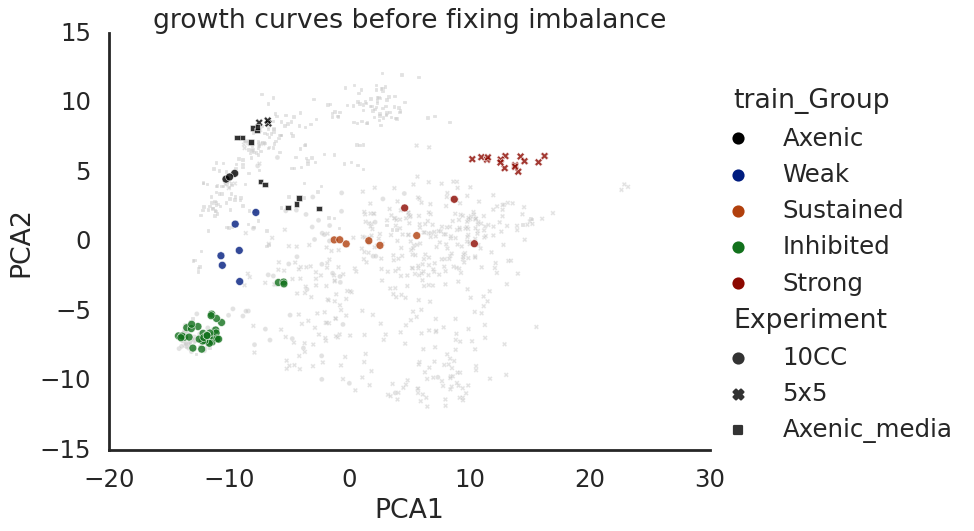

In [52]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    alpha=0.5, 
    zorder=-3,
    
    hue='train_Group', hue_order=tgorder[:-5], palette=tgpalette[:-5],
    s=20, legend=False,
)
plt.title('growth curves before fixing imbalance')

Text(0.5, 1.0, 'growth curves before fixing imbalance')

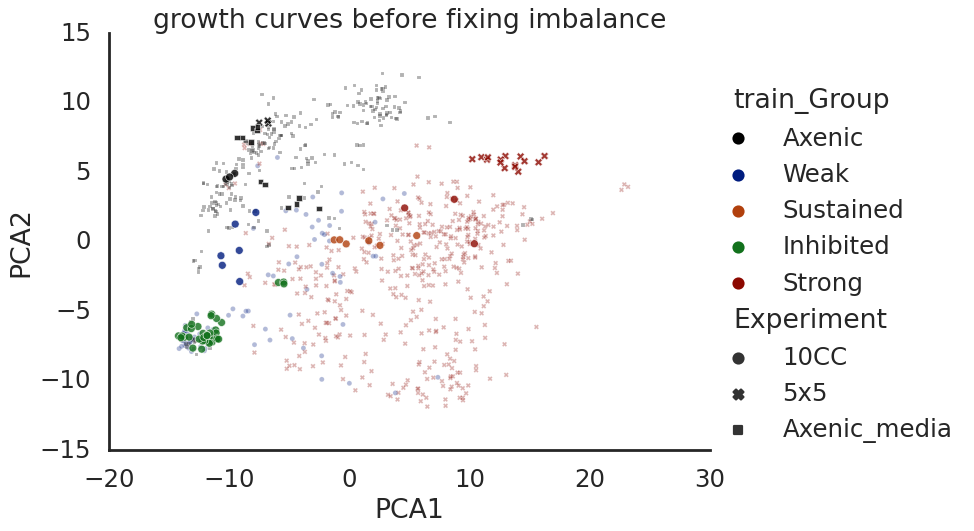

In [53]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    alpha=0.3, 
    zorder=-3,
    
    hue='Experiment', hue_order=eorder, palette=epalette,
    s=20, legend=False,
)
plt.title('growth curves before fixing imbalance')

In [54]:
pcadf.train_Group.value_counts()


Other        808
Inhibited     36
Axenic        18
Strong        18
Sustained      6
Weak           6
Name: train_Group, dtype: int64

# imbalance

In [55]:
X_ids = X_logged.index.get_level_values(2).astype(str)

In [56]:
from sklearn.model_selection import train_test_split
X_train_before_smt, X_test_before_smt, y_train_before_smt, y_test_before_smt = train_test_split(
    X_logged, y, test_size=0.5, stratify=y, random_state=43
)

X_train_before_smt = X_logged
y_train_before_smt = y
X_test_before_smt = X_logged
y_test_before_smt = y
X_train_before_smt.shape, y_train_before_smt.shape, X_test_before_smt.shape, y_test_before_smt.shape

((892, 126), (892,), (892, 126), (892,))

In [57]:
np.unique(y_train_before_smt, return_counts=True), np.unique(y_test_before_smt, return_counts=True)

((array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
        dtype=object),
  array([ 18,  36, 808,  18,   6,   6])),
 (array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
        dtype=object),
  array([ 18,  36, 808,  18,   6,   6])))

In [58]:
tdf  = X_test_before_smt.reset_index()
tdf.loc[~tdf.train_Group.isin(['Other'])].sort_values('train_Group')

train_Group       Sample         id         full name   Group  \
day                                                                 
0        Axenic          1A0          1            Axenic  Axenic   
16       Axenic  Ax_Media_D5  MED4_lowN  Axenic_MED4_lowN  Axenic   
15       Axenic  Ax_Media_D4  MED4_lowN  Axenic_MED4_lowN  Axenic   
14       Axenic  Ax_Media_C6  MED4_lowN  Axenic_MED4_lowN  Axenic   
13       Axenic  Ax_Media_C5  MED4_lowN  Axenic_MED4_lowN  Axenic   
..          ...          ...        ...               ...     ...   
886        Weak         10A0         10     Marinovum 5F3    Weak   
887        Weak         10B0         10     Marinovum 5F3    Weak   
888        Weak         10C0         10     Marinovum 5F3    Weak   
889        Weak         11A0         11   Roseovarius 5C3    Weak   
891        Weak         11C0         11   Roseovarius 5C3    Weak   

       Experiment ref_Bp[C]                                      \
day                     0.0 1.081944444442343 2.164583333331393   
0            10CC  1.277694          0.722813          1.392731   
16   Axenic_media  1.681292          1.709262          1.930650   
15   Axenic_media  1.602954          1.663299          1.878107   
14   Axenic_media  1.125832          0.869392          0.999997   
13   Axenic_media  1.266881          1.275312          1.033191   
..            ...       ...               ...               ...   
886          10CC  0.976664          1.135817          1.274119   
887          10CC  1.036432          0.638492          1.364520   
888          10CC  1.224758          1.036432          1.324873   
889          10CC  1.094424          1.186969          1.392731   
891          10CC  0.939522          0.898904          1.220718   

                       ...         ref_Bp[N]                    \
day 2.747222222220444  ... 73.76874999999563 76.93958333333285   
0            1.547360  ...          0.000000          0.000000   
16           2.079383  ...          0.000000          0.000000   
15           2.038827  ...          0.000000          0.000000   
14           0.915116  ...          0.000000          0.000000   
13           0.887098  ...          0.000000          0.000000   
..                ...  ...               ...               ...   
886          1.467796  ...          0.000000          0.000000   
887          1.558690  ...          0.000000          0.086151   
888          1.609635  ...          0.042246          0.000000   
889          1.575149  ...          0.000000          0.051389   
891          1.315186  ...          0.162540          0.086151   

                                                                     \
day 79.79513888888323 80.88888888888323 81.95833333332848  84.21875   
0            0.000000          0.000000          0.051389  0.000000   
16           0.000000          0.000000          0.000000  0.000000   
15           0.000000          0.000000          0.000000  0.000000   
14           0.000000          0.000000          0.000000  0.000000   
13           0.000000          0.000000          0.000000  0.000000   
..                ...               ...               ...       ...   
886          0.000000          0.000000          0.000000  0.000000   
887          0.000000          0.013601          0.013601  0.051389   
888          0.000000          0.169489          0.000000  0.133576   
889          0.094424          0.000000          0.233471  0.000000   
891          0.051389          0.094424          0.000000  0.051389   

                                                                   
day 86.8923611111095 87.7944444444438 88.74861111110658      91.0  
0           0.000000         0.000000          0.000000  0.000000  
16          0.000000         0.000000          0.000000  0.000000  
15          0.070235         0.010125          0.000000  0.000000  
14          0.218673         0.126760          0.002221  0.000000  
13          0.084991         0.048389      

In [59]:
 #sampling_strategy = {'Axenic' :100, 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],

In [60]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler, SMOTE

#over_sampler =  RandomOverSampler()
smoteenn = SMOTEENN(smote=SMOTE(k_neighbors=2))
X_smt, y_smt = smoteenn.fit_resample(X_train_before_smt, y_train_before_smt)

In [61]:
y_train_before_smt.value_counts()

Other        808
Inhibited     36
Axenic        18
Strong        18
Sustained      6
Weak           6
Name: train_Group, dtype: int64

In [62]:
np.unique(y_smt, return_counts=True)

(array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
       dtype=object),
 array([808, 808, 725, 808, 808, 808]))

In [63]:
from sklearn.decomposition import PCA
pca = Pipeline([
    ('scale', StandardScaler()),    
    ('clf', PCA(n_components=2))
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [64]:
X_smt

ref_Bp[C]                                                              \
day  0.000000  1.081944  2.164583  2.747222  3.754167  4.701389  5.720139    
0     1.277694  0.722813  1.392731  1.547360  1.677055  1.915610  2.202481   
1     1.004247  0.983726  1.352702  1.549269  1.705882  1.930906  2.183003   
2     1.449013  0.997514  1.381666  1.537687  1.750043  1.995473  2.221934   
3     1.358651  1.508308  1.518724  1.677697  1.870343  1.996990  2.101492   
4     1.343622  1.490206  1.577379  1.635362  1.854084  1.998629  2.114067   
...        ...       ...       ...       ...       ...       ...       ...   
4760  1.110827  1.001366  1.340201  1.500823  1.471138  1.744058  1.871212   
4761  1.104392  1.074178  1.360808  1.529981  1.558473  1.811679  1.944572   
4762  1.092279  0.940808  1.311071  1.457410  1.400658  1.684980  1.782216   
4763  1.223254  1.038168  1.325656  1.609237  1.737368  2.034434  2.153070   
4764  1.110132  1.168826  1.384553  1.579306  1.699078  1.930817  2.069778   

                                    ... ref_Bp[N]                      \
day  6.731944  7.984028  8.943750   ... 73.768750 76.939583 79.795139   
0     2.366749  2.622537  2.574251  ...  0.000000  0.000000  0.000000   
1     2.397440  2.653732  2.596339  ...  0.000000  0.000000  0.000000   
2     2.424245  2.675206  2.529591  ...  0.000000  0.086151  0.000000   
3     2.189908  2.351754  2.444636  ...  0.112203  0.000000  0.000000   
4     2.210278  2.389620  2.489753  ...  0.000000  0.000000  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
4760  1.984307  1.595871  1.612870  ...  0.000000  0.014408  0.124732   
4761  2.061443  1.676733  1.670867  ...  0.000000  0.028915  0.112842   
4762  1.854180  1.397466  1.519589  ...  0.021539  0.014554  0.122685   
4763  2.264323  1.850682  1.697225  ...  0.041759  0.000593  0.001089   
4764  2.191100  1.807931  1.752967  ...  0.005092  0.045196  0.083044   

                                                                            
day  80.888889 81.958333 84.218750 86.892361 87.794444 88.748611 91.000000  
0     0.000000  0.051389  0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000  0.000000  0.003617  0.000000  0.141000  
2     0.003617  0.000000  0.000000  0.000000  0.094424  0.003617  0.000000  
3     0.041134  0.015920  0.000000  0.000000  0.000000  0.000000  0.004780  
4     0.000000  0.105624  0.333784  0.000000  0.000000  0.000000  0.000000  
...        ...       ...       ...       ...       ...       ...       ...  
4760  0.131204  0.052737  0.198669  0.011608  0.064142  0.213619  0.010529  
4761  0.079733  0.123639  0.120731  0.027214  0.150377  0.237008  0.006398  
4762  0.159542  0.000000  0.229440  0.015681  0.038326  0.170221  0.013601  
4763  0.167534  0.002693  0.132035  0.000593  0.006850  0.003152  0.000000  
4764  0.020427  0.205333  0.016099  0.045196  0.250174  0.240307  0.000000  

[4765 rows x 126 columns]

In [65]:
Xpca = pca.fit_transform(X_smt)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'])
pcadf['train_Group'] = y_smt


Text(0.5, 1.0, 'growth curves after fixing imbalance')

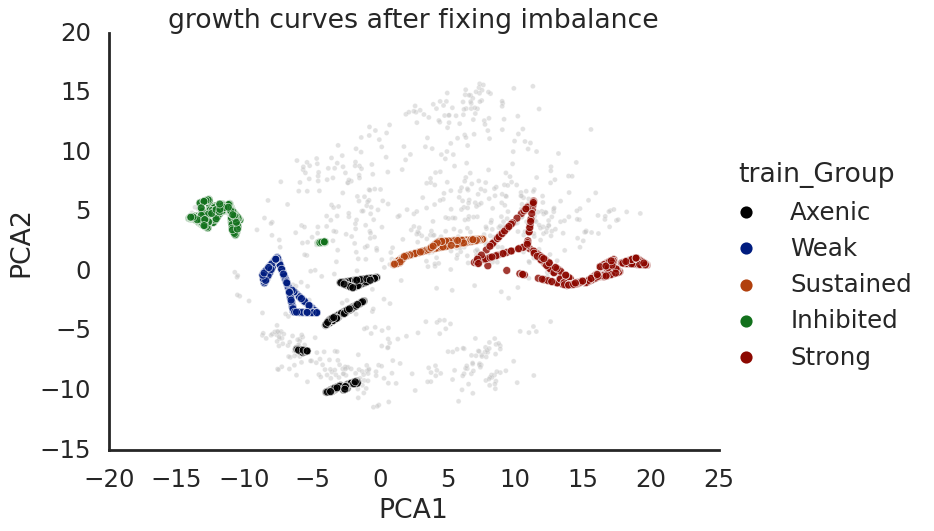

In [66]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  
    alpha=0.5, 
    zorder=-3,
    
    hue='train_Group', hue_order=tgorder[:-5], palette=tgpalette[:-5],
    s=20, legend=False,
)
plt.title('growth curves after fixing imbalance')

# Compute features

In [67]:
def _compute_max_features(df, groupby_col, nutrient, biomass_prefix):
    refmaxbp_df = df.loc[df.groupby(groupby_col)[f'{biomass_prefix}[{nutrient}]'].idxmax()].reset_index(drop=True)
    refmaxbp_df = refmaxbp_df.set_index(groupby_col)
    refmaxbp_df = refmaxbp_df[['day', f'{biomass_prefix}[{nutrient}]']]
    refmaxbp_df.rename(columns={
        'day' : f'max_{nutrient}day', 
        f'{biomass_prefix}[{nutrient}]' : f'max_{nutrient}biomass',
    }, inplace=True)
    return refmaxbp_df

def _compute_mean_features(df, groupby_col, nutrient, biomass_prefix):
    min_day = 30
    max_day = 60
    lterm_df = df.loc[df.day.ge(min_day) & df.day.le(max_day)]
    reflterm_df = lterm_df.groupby(groupby_col)[f'{biomass_prefix}[{nutrient}]'].agg(['mean', 'std', 'median'])
    reflterm_df.rename(columns={
        'mean' : f'mean_{nutrient}biomass',
        'median' : f'median_{nutrient}biomass',
        'std' : f'std_{nutrient}biomass',
    }, inplace=True)
    return reflterm_df

def _compute_lastday_features(df, groupby_col, nutrient, biomass_prefix):
    lod_lastday_threshold = np.log10(2)
    refmaxday_df = df.loc[df[f'{biomass_prefix}[{nutrient}]'].ge(lod_lastday_threshold)].groupby(groupby_col).day.max()
    #refmaxday_df.rename(columns=dict(day=f'last_day{nutrient}'), inplace=True)
    refmaxday_df.name = f'last_day{nutrient}'
    return refmaxday_df

def _compute_features(df, groupby_col, biomass_prefix):
    #return (
    df_list = (
        [_compute_max_features(df, groupby_col, nutrient, biomass_prefix) for nutrient in 'NC'] +
        [_compute_mean_features(df, groupby_col, nutrient, biomass_prefix) for nutrient in 'NC'] +
        [_compute_lastday_features(df, groupby_col, nutrient, biomass_prefix) for nutrient in 'NC']
    )
    df_merge = df_list[0].join(df_list[1:])
        
    df_merge.fillna(0, inplace=True) # for last day
    return df_merge
    

In [68]:
# log the biomass
def add_log_cols(df, biomass_prefix):
    lod_threshold = 1
    for nutrient in 'NC':
        df[f'log_{nutrient}biomass'] = np.log10(df[f'{biomass_prefix}[{nutrient}]'].clip(lower=lod_threshold))
    return df

In [69]:
def _X_smt_to_features(X_smt):
    x = X_smt.T.melt(ignore_index=False, var_name='smt_id',).reset_index()
    x = x.pivot(index=['smt_id', 'day'], values='value', columns='level_0').reset_index()
    return _compute_features(x, groupby_col='smt_id', biomass_prefix='ref_Bp')

X_smt_features = _X_smt_to_features(X_smt)

In [70]:
#x_groupby_col = ['shuffle_id', 'id', 'full name', ]# 'Group']
#x_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']
X_smt1 = X_smt.copy()

X_smt1.columns = [f'{col}_{day:2.1f}' for col,day in X_smt1.columns.values]

logistic_Nfeatures = [c for c in X_smt1.columns if c.startswith('ref_Bp[N]')]
logistic_Cfeatures = [c for c in X_smt1.columns if c.startswith('ref_Bp[C]')]
forest_features = X_smt_features.columns
X_train = X_smt_features.join(X_smt1)


In [71]:
X_test_features = _X_smt_to_features(X_test_before_smt.reset_index(drop=True))
X_test_features.index = X_test_before_smt.index


In [72]:
#x_groupby_col = ['shuffle_id', 'id', 'full name', ]# 'Group']
#x_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']
X_test1 = X_test_before_smt.copy()
X_test1.columns = [f'{col}_{day:2.1f}' for col,day in X_test1.columns.values]
X_test = X_test_features.join(X_test1)


In [73]:
y_smt

array(['Axenic', 'Axenic', 'Axenic', ..., 'Weak', 'Weak', 'Weak'],
      dtype=object)

In [74]:
pd.Series(y_smt).value_counts()

Axenic       808
Inhibited    808
Strong       808
Sustained    808
Weak         808
Other        725
dtype: int64

In [75]:
y_test = y_test_before_smt
y_train = y_smt

In [76]:
X_smt1.columns

Index(['ref_Bp[C]_0.0', 'ref_Bp[C]_1.1', 'ref_Bp[C]_2.2', 'ref_Bp[C]_2.7',
       'ref_Bp[C]_3.8', 'ref_Bp[C]_4.7', 'ref_Bp[C]_5.7', 'ref_Bp[C]_6.7',
       'ref_Bp[C]_8.0', 'ref_Bp[C]_8.9',
       ...
       'ref_Bp[N]_73.8', 'ref_Bp[N]_76.9', 'ref_Bp[N]_79.8', 'ref_Bp[N]_80.9',
       'ref_Bp[N]_82.0', 'ref_Bp[N]_84.2', 'ref_Bp[N]_86.9', 'ref_Bp[N]_87.8',
       'ref_Bp[N]_88.7', 'ref_Bp[N]_91.0'],
      dtype='object', length=126)

In [77]:
logistic_Cfeatures, logistic_Nfeatures, forest_features

(['ref_Bp[C]_0.0',
  'ref_Bp[C]_1.1',
  'ref_Bp[C]_2.2',
  'ref_Bp[C]_2.7',
  'ref_Bp[C]_3.8',
  'ref_Bp[C]_4.7',
  'ref_Bp[C]_5.7',
  'ref_Bp[C]_6.7',
  'ref_Bp[C]_8.0',
  'ref_Bp[C]_8.9',
  'ref_Bp[C]_9.7',
  'ref_Bp[C]_10.8',
  'ref_Bp[C]_11.7',
  'ref_Bp[C]_12.8',
  'ref_Bp[C]_13.7',
  'ref_Bp[C]_16.1',
  'ref_Bp[C]_16.7',
  'ref_Bp[C]_17.7',
  'ref_Bp[C]_18.7',
  'ref_Bp[C]_19.7',
  'ref_Bp[C]_20.8',
  'ref_Bp[C]_21.9',
  'ref_Bp[C]_23.9',
  'ref_Bp[C]_25.7',
  'ref_Bp[C]_26.7',
  'ref_Bp[C]_27.9',
  'ref_Bp[C]_29.8',
  'ref_Bp[C]_31.1',
  'ref_Bp[C]_31.8',
  'ref_Bp[C]_32.8',
  'ref_Bp[C]_33.7',
  'ref_Bp[C]_34.8',
  'ref_Bp[C]_36.9',
  'ref_Bp[C]_37.8',
  'ref_Bp[C]_39.9',
  'ref_Bp[C]_40.8',
  'ref_Bp[C]_41.8',
  'ref_Bp[C]_44.8',
  'ref_Bp[C]_46.8',
  'ref_Bp[C]_47.9',
  'ref_Bp[C]_48.8',
  'ref_Bp[C]_49.9',
  'ref_Bp[C]_51.8',
  'ref_Bp[C]_53.0',
  'ref_Bp[C]_54.8',
  'ref_Bp[C]_58.8',
  'ref_Bp[C]_59.9',
  'ref_Bp[C]_62.9',
  'ref_Bp[C]_65.7',
  'ref_Bp[C]_67.0',
  'ref_Bp[C

# Stacking classifier

The goal is to create multiple classifiers:
1. randomforest based on generated features: last day, max day, max value, mean late biomass (N & C), std late biomass (N & C)
2. logical regression based on N biomass
3. logical regression based on C biomass
4. tslearn based on N biomass 
5. tslearn based on C biomass 

and than combine the results using a stacking classifier

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
# Classifiers
clf_features = RandomForestClassifier()
clf_logisticN = LogisticRegression(penalty='l2', C=0.1, max_iter=10000)
clf_logisticC = LogisticRegression(penalty='l2', C=0.1, max_iter=10000)
clf_meta = LogisticRegression()

pipe_logisticN = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Nfeatures)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_logisticN)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_logisticC = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Cfeatures)], remainder='drop')),
    ('scale', StandardScaler()),    
    ('clf', clf_logisticC)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_forest = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', forest_features)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_features)
],
    memory='/tmp/Osnat/sklearn_cache',
)



stack = StackingClassifier(
    estimators=[
        ('logisticN', pipe_logisticN),
        ('logisticC', pipe_logisticC),
        ('ForestFeatures', pipe_forest),
    ],
    final_estimator=clf_meta,
    n_jobs = -1, verbose=True
)

#stack.fit(X_train, y_train)


# FOREST

In [79]:
class_weight = {i : 1 if i == 'Other' else 1000 for i in y.unique()}
class_weight

{'Axenic': 1000,
 'Inhibited': 1000,
 'Other': 1,
 'Strong': 1000,
 'Sustained': 1000,
 'Weak': 1000}

In [80]:
clf_features = RandomForestClassifier(class_weight=class_weight, # min_samples_leaf=25
                                     )
pipe_forest = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', forest_features)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_features)
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [81]:
pipe_forest.fit(X_train,y_train)

Pipeline(memory='/tmp/Osnat/sklearn_cache',
         steps=[('select',
                 ColumnTransformer(transformers=[('sel', 'passthrough',
                                                  Index(['max_Nday', 'max_Nbiomass', 'max_Cday', 'max_Cbiomass', 'mean_Nbiomass',
       'std_Nbiomass', 'median_Nbiomass', 'mean_Cbiomass', 'std_Cbiomass',
       'median_Cbiomass', 'last_dayN', 'last_dayC'],
      dtype='object'))])),
                ('scale', StandardScaler()),
                ('clf',
                 RandomForestClassifier(class_weight={'Axenic': 1000,
                                                      'Inhibited': 1000,
                                                      'Other': 1,
                                                      'Strong': 1000,
                                                      'Sustained': 1000,
                                                      'Weak': 1000}))])

<Axes: xlabel='Importance', ylabel='Feature'>

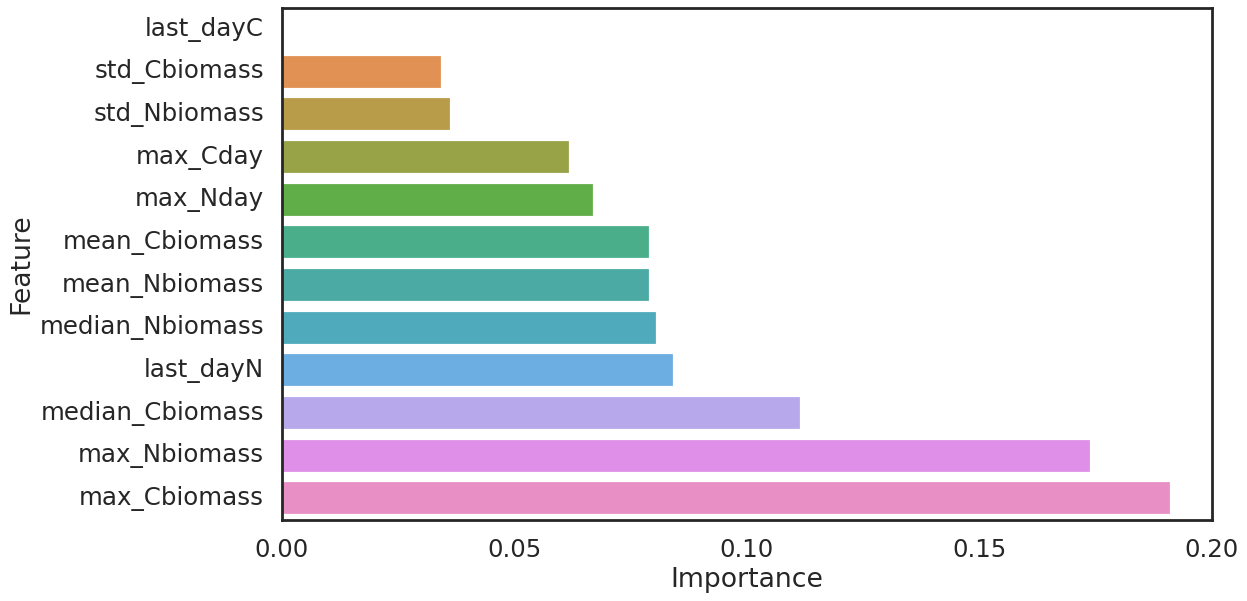

In [82]:
forest_importance_df = pd.DataFrame(dict(Feature=forest_features, Importance=pipe_forest.named_steps.clf.feature_importances_))
forest_importance_df =forest_importance_df.sort_values('Importance')
                                    
sns.barplot(data=forest_importance_df, y='Feature', x='Importance')


In [83]:
y_pred_prop = pipe_forest.predict_proba(X_test)
y_pred = pipe_forest.predict(X_test)

In [84]:
tdf  = X_test_before_smt.reset_index()
tdf.loc[~tdf.train_Group.isin(['Other'])].sort_values('train_Group')[['train_Group', 'id', 'full name']]

,train_Group,id,full name
day,,,
0,Axenic,1,Axenic
16,Axenic,MED4_lowN,Axenic_MED4_lowN
15,Axenic,MED4_lowN,Axenic_MED4_lowN
14,Axenic,MED4_lowN,Axenic_MED4_lowN
13,Axenic,MED4_lowN,Axenic_MED4_lowN
...,...,...,...
886,Weak,10,Marinovum 5F3
887,Weak,10,Marinovum 5F3
888,Weak,10,Marinovum 5F3


In [85]:
from sklearn.metrics import balanced_accuracy_score
print(pipe_forest.score(X_train, y_train), pipe_forest.score(X_test, y_test))
print(balanced_accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

1.0 0.9417040358744395
0.9892739273927393
              precision    recall  f1-score   support

      Axenic       0.78      1.00      0.88        18
   Inhibited       0.44      1.00      0.61        36
       Other       1.00      0.94      0.97       808
      Strong       1.00      1.00      1.00        18
   Sustained       0.86      1.00      0.92         6
        Weak       1.00      1.00      1.00         6

    accuracy                           0.94       892
   macro avg       0.85      0.99      0.90       892
weighted avg       0.97      0.94      0.95       892



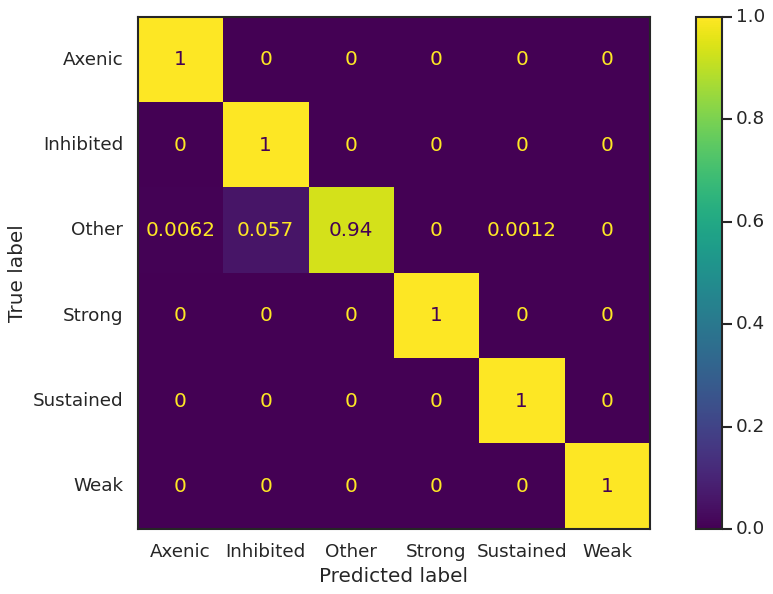

In [86]:
sns.set_context('talk')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=y_pred, normalize='true')
#plt.xlim((0,30))

# stack

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(y_train), le.classes_


(array([0, 0, 0, ..., 5, 5, 5]),
 array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
       dtype=object))

In [88]:
class_weight_map = {'Axenic' : 100, 'Inhibited' : 100, 'Other': 1, 'Strong' : 10000, 'Sustained' : 10000, 'Weak': 100}

In [89]:
class_weight = {i : class_weight_map[c] for i,c in enumerate(le.classes_)}
class_weight

{0: 100, 1: 100, 2: 1, 3: 10000, 4: 10000, 5: 100}

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
# Classifiers
clf_features = RandomForestClassifier(ccp_alpha=0.05, class_weight=class_weight)
clf_logisticN = LogisticRegression(penalty='l2', C=0.1, max_iter=10000, class_weight=class_weight,)
clf_logisticC = LogisticRegression(penalty='l2', C=0.1, max_iter=10000, class_weight=class_weight,)
clf_meta = LogisticRegression()

pipe_logisticN = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Nfeatures)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_logisticN)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_logisticC = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Cfeatures)], remainder='drop')),
    ('scale', StandardScaler()),    
    ('clf', clf_logisticC)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_forest = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', forest_features)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_features)
],
    memory='/tmp/Osnat/sklearn_cache',
)



stack = StackingClassifier(
    estimators=[
        ('logisticN', pipe_logisticN),
        ('logisticC', pipe_logisticC),
        ('ForestFeatures', pipe_forest),
    ],
    final_estimator=clf_meta,
    n_jobs = -1, verbose=True
)



In [91]:
stack.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:370: UserWarning: Persisting input arguments took 0.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:370: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance pr

StackingClassifier(estimators=[('logisticN',
                                Pipeline(memory='/tmp/Osnat/sklearn_cache',
                                         steps=[('select',
                                                 ColumnTransformer(transformers=[('sel',
                                                                                  'passthrough',
                                                                                  ['ref_Bp[N]_0.0',
                                                                                   'ref_Bp[N]_1.1',
                                                                                   'ref_Bp[N]_2.2',
                                                                                   'ref_Bp[N]_2.7',
                                                                                   'ref_Bp[N]_3.8',
                                                                                   'ref_Bp[N]_4.7',
                                                                                   'ref_Bp[N]_5.7',
                                                                                   'ref_Bp[N]_6.7',
                                                                                   'ref_Bp[N]_8.0',
                                                                                   'ref_Bp[N]_8.9',
                                                                                   'ref_Bp[N]_9.7',
                                                                                   'ref_Bp[N]_10.8'...
                                                                                  Index(['max_Nday', 'max_Nbiomass', 'max_Cday', 'max_Cbiomass', 'mean_Nbiomass',
       'std_Nbiomass', 'median_Nbiomass', 'mean_Cbiomass', 'std_Cbiomass',
       'median_Cbiomass', 'last_dayN', 'last_dayC'],
      dtype='object'))])),
                                                ('scale', StandardScaler()),
                                                ('clf',
                                                 RandomForestClassifier(ccp_alpha=0.05,
                                                                        class_weight={0: 100,
                                                                                      1: 100,
                                                                                      2: 1,
                                                                                      3: 10000,
                                                                                      4: 10000,
                                                                                      5: 100}))]))],
                   final_estimator=LogisticRegression(), n_jobs=-1,
                   verbose=True)

In [92]:
y_pred_prop = stack.predict_proba(X_test)
y_pred = stack.predict(X_test)

In [93]:
y_pred_prop

array([[9.31089685e-01, 5.50804152e-04, 6.76480757e-02, 3.24837587e-05,
        5.18469411e-04, 1.60482091e-04],
       [9.30559680e-01, 5.54218642e-04, 6.81695837e-02, 3.26962156e-05,
        5.21361456e-04, 1.62460524e-04],
       [9.31040038e-01, 5.51764134e-04, 6.76958118e-02, 3.25356572e-05,
        5.18766168e-04, 1.61083717e-04],
       ...,
       [6.08656843e-05, 4.59358999e-04, 1.28097563e-02, 1.12599904e-05,
        6.08921013e-04, 9.86049838e-01],
       [6.04878148e-05, 4.58347173e-04, 1.26759414e-02, 1.12212041e-05,
        6.06595363e-04, 9.86187407e-01],
       [6.05165653e-05, 4.59300451e-04, 1.27075325e-02, 1.12324058e-05,
        6.07834051e-04, 9.86153584e-01]])

In [94]:
from sklearn.metrics import balanced_accuracy_score
#print(pipe_forest.score(X_train, y_train), pipe_forest.score(X_test, y_test))
print(balanced_accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9696782178217821
              precision    recall  f1-score   support

      Axenic       0.25      1.00      0.40        18
   Inhibited       0.36      1.00      0.53        36
       Other       1.00      0.82      0.90       808
      Strong       0.42      1.00      0.59        18
   Sustained       0.86      1.00      0.92         6
        Weak       0.67      1.00      0.80         6

    accuracy                           0.84       892
   macro avg       0.59      0.97      0.69       892
weighted avg       0.94      0.84      0.87       892



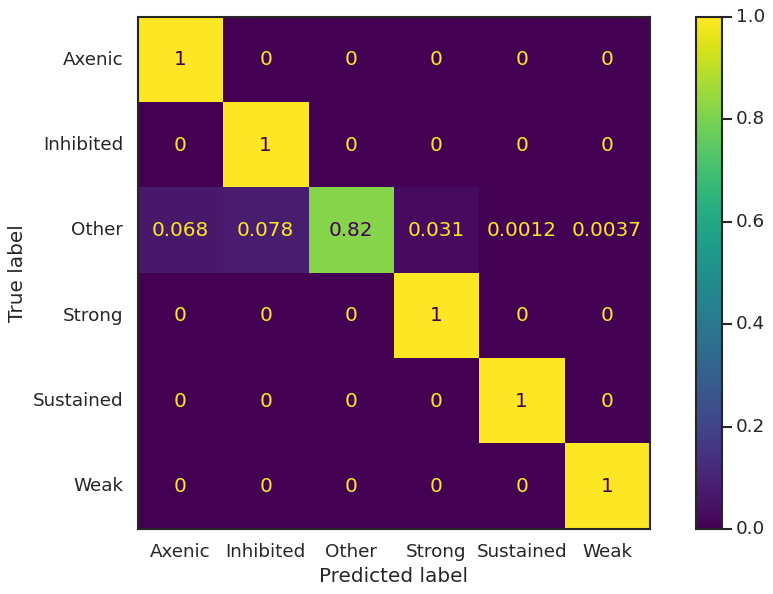

In [95]:
sns.set_context('talk')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=y_pred, normalize='true')
#plt.xlim((0,30))

In [96]:
X_test

max_Nday  \
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         7.984028   
            1B0      1           Axenic          Axenic 10CC         7.984028   
            1C0      1           Axenic          Axenic 10CC         7.984028   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         3.754167   
            10C0     10          Marinovum 5F3   Weak   10CC         6.731944   
            11A0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11B0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11C0     11          Roseovarius 5C3 Weak   10CC         4.701389   

                                                                    max_Nbiomass  \
train_Group Sample   id          full name       Group  Experiment                 
Axenic      1A0      1           Axenic          Axenic 10CC            1.801351   
            1B0      1           Axenic          Axenic 10CC            1.832546   
            1C0      1           Axenic          Axenic 10CC            1.854021   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5             2.245869   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5             2.220034   
...                                                                          ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC            0.746725   
            10C0     10          Marinovum 5F3   Weak   10CC            1.444111   
            11A0     11          Roseovarius 5C3 Weak   10CC            1.359746   
            11B0     11          Roseovarius 5C3 Weak   10CC            1.105747   
            11C0     11          Roseovarius 5C3 Weak   10CC            0.806311   

                                                                     max_Cday  \
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         7.984028   
            1B0      1           Axenic          Axenic 10CC         7.984028   
            1C0      1           Axenic          Axenic 10CC         7.984028   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         3.754167   
            10C0     10          Marinovum 5F3   Weak   10CC         6.731944   
            11A0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11B0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11C0     11          Roseovarius 5C3 Weak   10CC         4.701389   

                                                                    max_Cbiomass  \
train_Group Sample   id          full name       Group  Experiment                 
Axenic      1A0      1           Axenic          Axenic 10CC            2.622537   
            1B0      1           Axenic          Axenic 10CC            2.653732   
            1C0      1           Axenic          Axenic 10CC            2.675206   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5             3.067055   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5             3.041220   
...                                                                          ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC            1.567911   
            10C0     10          Marinovum 5F3   Weak   10CC            2.265297   
            11A0     11     

In [97]:
df_predicted = pd.DataFrame(y_pred_prop, columns=stack.classes_)
df_predicted['y'] = y_test
df_predicted['y_pred'] = y_pred

df_predicted.index = X_test.index
df_predicted = df_predicted.reset_index()
df_predicted


,train_Group,Sample,id,full name,Group,Experiment,Axenic,Inhibited,Other,Strong,Sustained,Weak,y,y_pred
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.931090,0.000551,0.067648,0.000032,0.000518,0.000160,Axenic,Axenic
1,Axenic,1B0,1,Axenic,Axenic,10CC,0.930560,0.000554,0.068170,0.000033,0.000521,0.000162,Axenic,Axenic
2,Axenic,1C0,1,Axenic,Axenic,10CC,0.931040,0.000552,0.067696,0.000033,0.000519,0.000161,Axenic,Axenic
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.923292,0.000586,0.075410,0.000043,0.000500,0.000169,Axenic,Axenic
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.922960,0.000587,0.075739,0.000043,0.000502,0.000170,Axenic,Axenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Weak,10B0,10,Marinovum 5F3,Weak,10CC,0.000061,0.000460,0.012686,0.000011,0.000607,0.986176,Weak,Weak
888,Weak,10C0,10,Marinovum 5F3,Weak,10CC,0.000050,0.000468,0.014854,0.000022,0.000472,0.984135,Weak,Weak
889,Weak,11A0,11,Roseovarius 5C3,Weak,10CC,0.000061,0.000459,0.012810,0.000011,0.000609,0.986050,Weak,Weak
890,Weak,11B0,11,Roseovarius 5C3,Weak,10CC,0.000060,0.000458,0.012676,0.000011,0.000607,0.986187,Weak,Weak


In [98]:
df_predicted.columns

Index(['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
       'Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak', 'y',
       'y_pred'],
      dtype='object')

In [99]:
mdf_predicted = df_predicted.melt(
    id_vars=['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
        'y', 'y_pred'], 
    var_name='predicted', value_name='prob')
#mdf_predicted.predicted = pd.to_numeric(mdf_predicted.predicted)
mdf_predicted['predicted_correctly'] = (mdf_predicted['y'] == mdf_predicted['predicted']).map({
    True: 'correct prediction', False: 'false prediction'
})



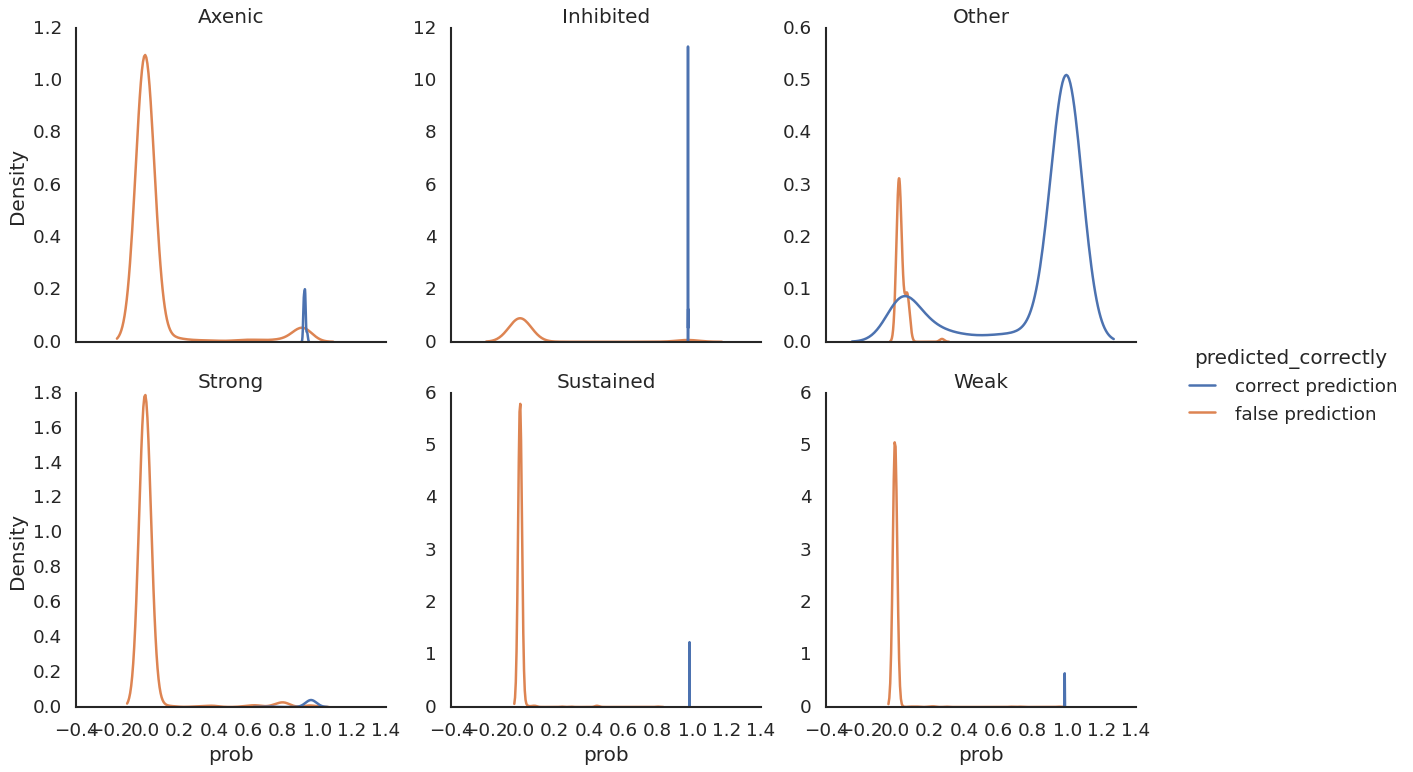

In [100]:
g=sns.displot(data=mdf_predicted, #.loc[mdf_predicted.predicted.isin([3])], 
            x='prob',
            kind='kde',
            col='predicted',
            hue='predicted_correctly',
            col_wrap=3,
              #stat='percent',
              #log_scale=True,
          #clip=(0,1),
              facet_kws=dict(sharey=False),
           )
g.set_titles(col_template='{col_name}')
#g.set(yscale='log')

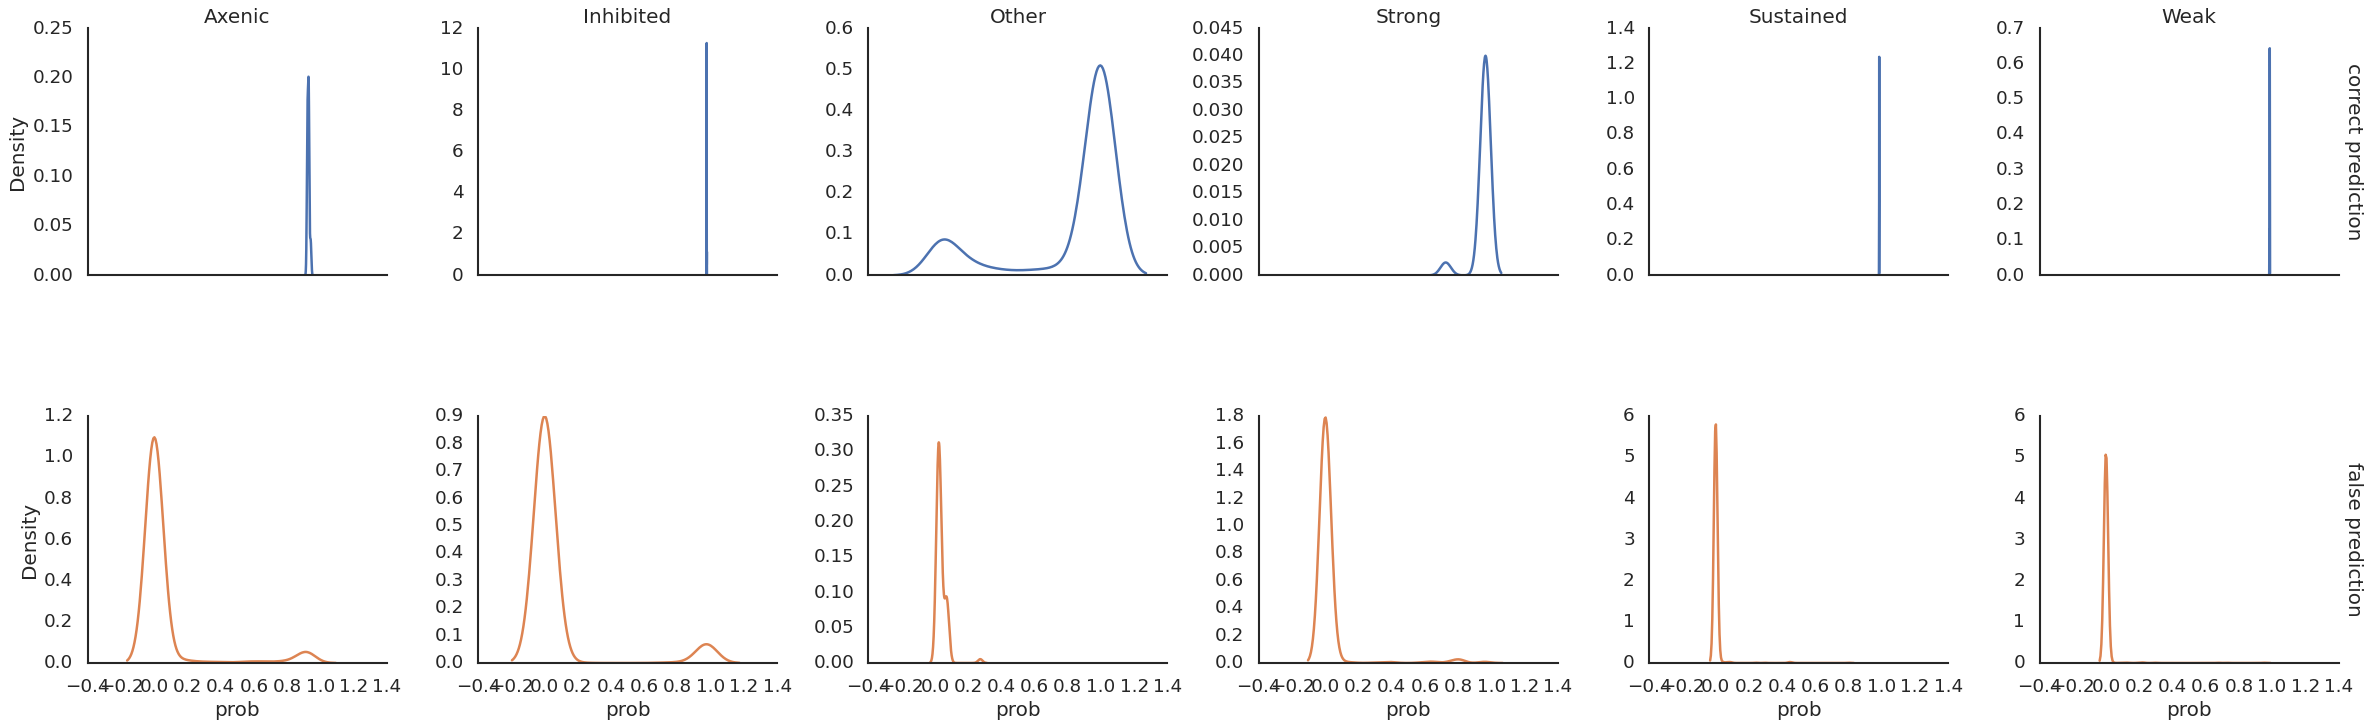

In [101]:
g=sns.displot(data=mdf_predicted, #.loc[mdf_predicted.predicted_correctly.isin([True])], 
            x='prob',
            kind='kde',
            col='predicted',
            row='predicted_correctly',
            hue='predicted_correctly',
            #col_wrap=3,
              #stat='percent',
              #log_scale=True,
          #clip=(0,1),
              legend=False,
              facet_kws=dict(sharey=False, margin_titles=True),
           )
g.set_titles(col_template='{col_name}', row_template='{row_name}', )
#g.set(yscale='log')

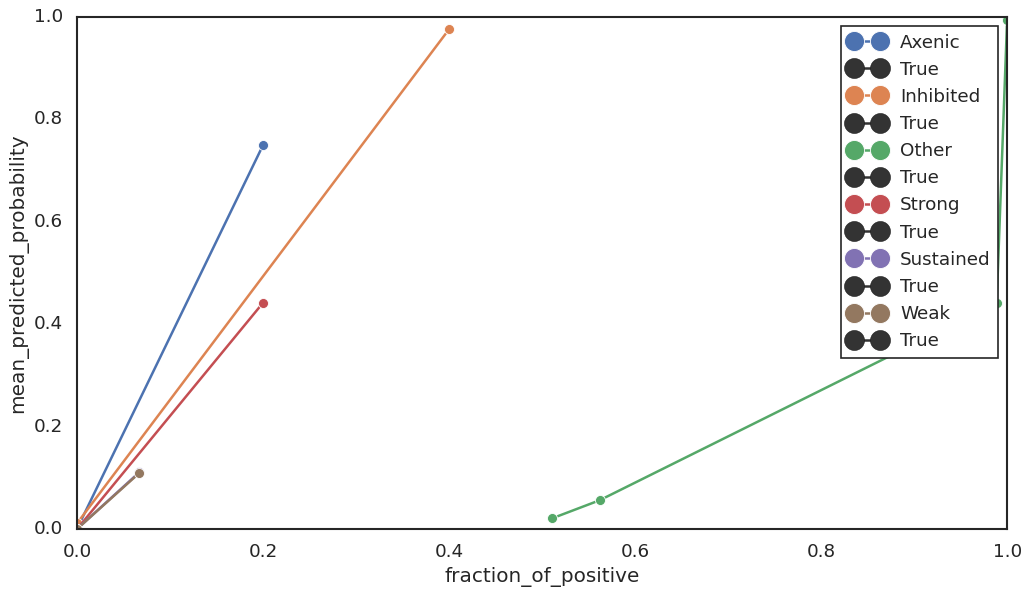

In [102]:
from sklearn.calibration import calibration_curve
for class_ in stack.classes_:
    sns.lineplot(
    #sns.scatterplot(
        data=pd.DataFrame(calibration_curve(
            y_test==class_, df_predicted[class_], 
            strategy='quantile', 
            n_bins=10,)).T,
        x=0, y=1, markers=True, style=True,
        label=class_
    )
plt.gca().set(xlabel='fraction_of_positive', ylabel='mean_predicted_probability')
plt.show()

# classify simulations

In [104]:
dpath = '../results'
sim_df1 = pd.read_csv(os.path.join(dpath,'monte4_df.csv.gz',))
sim_df2 = pd.read_csv(os.path.join(dpath,'monte_df.csv.gz',))
sim_df3 = pd.read_csv(os.path.join(dpath,'monte3_EXOENZYME_df.csv.gz',))
sim_df4 = pd.read_csv(os.path.join(dpath,'monte3_MIN_df.csv.gz',))
sim_df5 = pd.read_csv(os.path.join(dpath,'monte3_MIXOTROPH_df.csv.gz',))
sim_df6 = pd.read_csv(os.path.join(dpath,'monte3_OVERFLOW_df.csv.gz',))
sim_df7 = pd.read_csv(os.path.join(dpath,'monte3_ROS_df.csv.gz',))

sim_df = pd.concat([
    sim_df1,
    sim_df2,
    sim_df3,
    sim_df4,
    sim_df5,
    sim_df6,
    sim_df7,
])

In [105]:
sim_df = sim_df[['run_id', 'day', 'Bptotal[N]','Bptotal[C]']]

In [106]:
min_values = sim_df.groupby('run_id').min().min(axis=1)
bad_ids_negative_values = set(min_values[min_values< 0].index)
len(bad_ids_negative_values)

2422

In [107]:
max_values = sim_df.groupby('run_id').max().max(axis=1)
bad_ids_toobig_values = set(max_values[max_values>1e5].index)
len(bad_ids_toobig_values)

23

In [108]:
sim_df = sim_df.loc[~sim_df.run_id.isin(bad_ids_negative_values | bad_ids_toobig_values)].copy()

In [109]:
sim_df.rename(columns={'Bptotal[N]':'ref_Bp[N]','Bptotal[C]':'ref_Bp[C]'}, inplace=True)

In [110]:
sim_df

,run_id,day,ref_Bp[N],ref_Bp[C]
0,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,0.000000,8.928571e-01,5.915179e+00
1,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,1.081944,2.479189e+00,1.185047e+01
2,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,2.164583,4.956136e+00,2.367856e+01
3,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,2.747222,7.191525e+00,3.435842e+01
4,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,3.754167,1.368312e+01,6.537315e+01
...,...,...,...,...
396032,monte3_ROS_68_monte_shgo3_sobol_644_ROS_25_low...,110.943750,1.912812e-07,1.814035e-06
396033,monte3_ROS_68_monte_shgo3_sobol_644_ROS_25_low...,115.845833,7.656362e-08,7.260999e-07
396034,monte3_ROS_68_monte_shgo3_sobol_644_ROS_25_low...,118.788889,4.418614e-08,4.190447e-07
396035,monte3_ROS_68_monte_shgo3_sobol_644_ROS_25_low...,121.777778,2.528318e-08,2.397764e-07


In [111]:
for c in ['ref_Bp[N]', 'ref_Bp[C]']:
    sim_df[c] = np.log10(sim_df[c].clip(lower=1))

In [112]:
sim_df_filtered = sim_df.loc[sim_df.day.le(91)]
len(timepoints_10cc_transfer0), sim_df_filtered.day.nunique()

(63, 63)

In [154]:
X_sim_logistic = sim_df_filtered.pivot_table(index='run_id', values=['ref_Bp[N]', 'ref_Bp[C]'],columns='day')

In [118]:
X_sim.loc[X_sim.isna().sum(axis=1).ge(1)]

,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,mean_Nbiomass,std_Nbiomass,median_Nbiomass,mean_Cbiomass,std_Cbiomass,median_Cbiomass,...,ref_Bp[N]_73.8,ref_Bp[N]_76.9,ref_Bp[N]_79.8,ref_Bp[N]_80.9,ref_Bp[N]_82.0,ref_Bp[N]_84.2,ref_Bp[N]_86.9,ref_Bp[N]_87.8,ref_Bp[N]_88.7,ref_Bp[N]_91.0
run_id,,,,,,,,,,,,,,,,,,,,,
monte3_OVERFLOW_100_monte_shgo4_sobol_737_OVERFLOW_57_lowN_all_OVERFLOW_h-2074384540759412348,5.720139,2.123242,5.720139,2.944427,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monte3_OVERFLOW_10_monte_shgo4_sobol_882_OVERFLOW_12_lowN_all_OVERFLOW_h-2074384540759412348,2.164583,0.633819,2.164583,1.455005,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monte3_OVERFLOW_10_monte_shgo4_sobol_882_OVERFLOW_12_lowN_all_OVERFLOW_h-2074384540759412348,2.164583,0.633819,1.081944,1.131110,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monte3_OVERFLOW_10_monte_shgo4_sobol_882_OVERFLOW_12_lowN_all_OVERFLOW_h-2074384540759412348,2.164583,0.633819,2.747222,1.629260,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monte3_OVERFLOW_10_monte_shgo4_sobol_882_OVERFLOW_12_lowN_all_OVERFLOW_h-2074384540759412348,2.164583,0.633819,6.731944,2.821024,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
monte_ROS_80_monte_vpro_4902_ROS_7_lowN_all_ROS_h5853139000967720769,16.727083,0.000000,16.727083,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monte_ROS_80_monte_vpro_4902_ROS_7_lowN_all_ROS_h5853139000967720769,16.727083,0.000000,5.720139,2.517230,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monte_ROS_80_monte_vpro_4902_ROS_7_lowN_all_ROS_h5853139000967720769,5.720139,1.552638,16.727083,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
missing_values = X_sim_logistic.loc[X_sim_logistic.isna().sum(axis=1).ge(1)].index
missing_values

Index(['monte3_OVERFLOW_100_monte_shgo4_sobol_737_OVERFLOW_57_lowN_all_OVERFLOW_h-2074384540759412348',
       'monte3_OVERFLOW_10_monte_shgo4_sobol_882_OVERFLOW_12_lowN_all_OVERFLOW_h-2074384540759412348',
       'monte3_OVERFLOW_18_monte_shgo4_sobol_669_OVERFLOW_9_lowN_all_OVERFLOW_h-2074384540759412348',
       'monte3_OVERFLOW_24_monte_shgo3_sobol_753_OVERFLOW_41_lowN_all_OVERFLOW_h-2074384540759412348',
       'monte3_OVERFLOW_29_monte_shgo3_sobol_406_OVERFLOW_37_lowN_all_OVERFLOW_h-2074384540759412348',
       'monte3_OVERFLOW_29_monte_shgo4_sobol_18_OVERFLOW_59_lowN_all_OVERFLOW_h-2074384540759412348',
       'monte3_OVERFLOW_29_monte_shgo4_sobol_274_OVERFLOW_71_lowN_all_OVERFLOW_h-2074384540759412348',
       'monte3_OVERFLOW_32_monte_shgo4_sobol_725_OVERFLOW_12_lowN_all_OVERFLOW_h-2074384540759412348',
       'monte3_OVERFLOW_39_monte_shgo4_sobol_669_OVERFLOW_25_lowN_all_OVERFLOW_h-2074384540759412348',
       'monte3_OVERFLOW_42_monte_shgo4_sobol_17_OVERFLOW_6_lowN_all_OVERFL

In [159]:
len(missing_values)

93

In [160]:
X_sim_logistic1 = X_sim_logistic.drop(index=missing_values)
X_sim_logistic.shape, X_sim_logistic1.shape, missing_values.shape

((122553, 126), (122460, 126), (93,))

In [163]:
sim_df_filtered = sim_df_filtered.loc[~sim_df_filtered.run_id.isin(missing_values)]

In [161]:
X_sim_logistic1.loc[X_sim_logistic1.isna().sum(axis=1).ge(1)]

Empty DataFrame
Columns: [(ref_Bp[C], 0.0), (ref_Bp[C], 1.0819444444444444), (ref_Bp[C], 2.1645833333333333), (ref_Bp[C], 2.7472222222222222), (ref_Bp[C], 3.754166666666667), (ref_Bp[C], 4.701388888888889), (ref_Bp[C], 5.720138888888889), (ref_Bp[C], 6.731944444444444), (ref_Bp[C], 7.9840277777777775), (ref_Bp[C], 8.94375), (ref_Bp[C], 9.745833333333334), (ref_Bp[C], 10.834722222222222), (ref_Bp[C], 11.718055555555557), (ref_Bp[C], 12.830555555555556), (ref_Bp[C], 13.695833333333333), (ref_Bp[C], 16.14097222222222), (ref_Bp[C], 16.727083333333333), (ref_Bp[C], 17.727083333333333), (ref_Bp[C], 18.71180555555556), (ref_Bp[C], 19.711111111111112), (ref_Bp[C], 20.778472222222224), (ref_Bp[C], 21.88055555555556), (ref_Bp[C], 23.898611111111112), (ref_Bp[C], 25.73472222222222), (ref_Bp[C], 26.747222222222224), (ref_Bp[C], 27.85277777777777), (ref_Bp[C], 29.784027777777776), (ref_Bp[C], 31.07638888888889), (ref_Bp[C], 31.81805555555556), (ref_Bp[C], 32.77916666666667), (ref_Bp[C], 33.736111111111114), (ref_Bp[C], 34.770833333333336), (ref_Bp[C], 36.90277777777778), (ref_Bp[C], 37.78888888888889), (ref_Bp[C], 39.90833333333333), (ref_Bp[C], 40.84444444444444), (ref_Bp[C], 41.83472222222223), (ref_Bp[C], 44.759027777777774), (ref_Bp[C], 46.79444444444445), (ref_Bp[C], 47.91875), (ref_Bp[C], 48.81041666666667), (ref_Bp[C], 49.90763888888889), (ref_Bp[C], 51.78402777777778), (ref_Bp[C], 53.00208333333333), (ref_Bp[C], 54.79375), (ref_Bp[C], 58.8375), (ref_Bp[C], 59.91180555555555), (ref_Bp[C], 62.89236111111112), (ref_Bp[C], 65.65138888888889), (ref_Bp[C], 66.99305555555556), (ref_Bp[C], 67.98402777777778), (ref_Bp[C], 69.80208333333333), (ref_Bp[C], 72.775), (ref_Bp[C], 73.76875), (ref_Bp[C], 76.93958333333333), (ref_Bp[C], 79.79513888888889), (ref_Bp[C], 80.88888888888889), (ref_Bp[C], 81.95833333333333), (ref_Bp[C], 84.21875), (ref_Bp[C], 86.89236111111111), (ref_Bp[C], 87.79444444444445), (ref_Bp[C], 88.74861111111112), (ref_Bp[C], 91.0), (ref_Bp[N], 0.0), (ref_Bp[N], 1.0819444444444444), (ref_Bp[N], 2.1645833333333333), (ref_Bp[N], 2.7472222222222222), (ref_Bp[N], 3.754166666666667), (ref_Bp[N], 4.701388888888889), (ref_Bp[N], 5.720138888888889), (ref_Bp[N], 6.731944444444444), (ref_Bp[N], 7.9840277777777775), (ref_Bp[N], 8.94375), (ref_Bp[N], 9.745833333333334), (ref_Bp[N], 10.834722222222222), (ref_Bp[N], 11.718055555555557), (ref_Bp[N], 12.830555555555556), (ref_Bp[N], 13.695833333333333), (ref_Bp[N], 16.14097222222222), (ref_Bp[N], 16.727083333333333), (ref_Bp[N], 17.727083333333333), (ref_Bp[N], 18.71180555555556), (ref_Bp[N], 19.711111111111112), (ref_Bp[N], 20.778472222222224), (ref_Bp[N], 21.88055555555556), (ref_Bp[N], 23.898611111111112), (ref_Bp[N], 25.73472222222222), (ref_Bp[N], 26.747222222222224), (ref_Bp[N], 27.85277777777777), (ref_Bp[N], 29.784027777777776), (ref_Bp[N], 31.07638888888889), (ref_Bp[N], 31.81805555555556), (ref_Bp[N], 32.77916666666667), (ref_Bp[N], 33.736111111111114), (ref_Bp[N], 34.770833333333336), (ref_Bp[N], 36.90277777777778), (ref_Bp[N], 37.78888888888889), (ref_Bp[N], 39.90833333333333), (ref_Bp[N], 40.84444444444444), (ref_Bp[N], 41.83472222222223), ...]
Index: []

[0 rows x 126 columns]

In [162]:
X_sim_logistic1.index.value_counts()

monte3_EXOENZYME_100_monte_shgo3_sobol_151_EXOENZYME_5_lowN_all_EXOENZYME_h1628948357718170805    1
monte_EXOENZYME_24_monte_vpro_3288_EXOENZYME_64_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3439_EXOENZYME_17_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3367_EXOENZYME_89_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3359_EXOENZYME_77_lowN_all_EXOENZYME_h1628948357718170805           1
                                                                                                 ..
monte4_EXOENZYME_40_monte_vpro_428_EXOENZYME_35_lowN_all_EXOENZYME_h1628948357718170805           1
monte4_EXOENZYME_40_monte_vpro_4244_EXOENZYME_1_lowN_all_EXOENZYME_h1628948357718170805           1
monte4_EXOENZYME_40_monte_vpro_4212_EXOENZYME_70_lowN_all_EXOENZYME_h1628948357718170805          1
monte4_EXOENZYME_40_monte_vpro_4212_EXOENZYME_65_lowN_all_EXOENZYME_h1628948357718170805          1


In [174]:
# meed to do that so idxmax will give the correct results
sim_df_filtered = sim_df_filtered.reset_index(drop=True)

In [175]:
sim_groupby_col = ['run_id']
# 'Group']
#sim_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']

psim_feature_df = _compute_features(sim_df_filtered, sim_groupby_col, 'ref_Bp')
#psim_df = sim_df.pivot(index=sim_groupby_col, values=sim_log_col, columns='day')



In [176]:
psim_feature_df.shape, X_sim_logistic1.shape

((122460, 12), (122460, 126))

In [177]:
X_sim_logistic1.columns = [f'{col}_{day:2.1f}' for col,day in X_sim_logistic1.columns.values]


In [178]:
X_sim = psim_feature_df.join(X_sim_logistic1)


In [179]:
X_sim

,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,mean_Nbiomass,std_Nbiomass,median_Nbiomass,mean_Cbiomass,std_Cbiomass,median_Cbiomass,...,ref_Bp[N]_73.8,ref_Bp[N]_76.9,ref_Bp[N]_79.8,ref_Bp[N]_80.9,ref_Bp[N]_82.0,ref_Bp[N]_84.2,ref_Bp[N]_86.9,ref_Bp[N]_87.8,ref_Bp[N]_88.7,ref_Bp[N]_91.0
run_id,,,,,,,,,,,,,,,,,,,,,
monte3_EXOENZYME_100_monte_shgo3_sobol_151_EXOENZYME_5_lowN_all_EXOENZYME_h1628948357718170805,7.984028,1.782389,8.943750,2.625218,0.012787,0.036273,0.000000,0.379969,0.411284,0.264866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
monte3_EXOENZYME_100_monte_shgo3_sobol_163_EXOENZYME_40_lowN_all_EXOENZYME_h1628948357718170805,5.720139,1.851663,6.731944,2.731241,0.174630,0.218042,0.042282,0.940880,0.421606,0.968354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
monte3_EXOENZYME_100_monte_shgo3_sobol_163_EXOENZYME_69_lowN_all_EXOENZYME_h1628948357718170805,5.720139,1.823818,6.731944,2.698829,0.005852,0.019687,0.000000,0.363410,0.398939,0.240968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
monte3_EXOENZYME_100_monte_shgo3_sobol_199_EXOENZYME_33_lowN_all_EXOENZYME_h1628948357718170805,6.731944,1.741527,6.731944,2.688721,0.000000,0.000000,0.000000,0.262599,0.308514,0.111484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
monte3_EXOENZYME_100_monte_shgo3_sobol_199_EXOENZYME_66_lowN_all_EXOENZYME_h1628948357718170805,6.731944,1.718817,6.731944,2.671097,0.000000,0.000000,0.000000,0.295929,0.334026,0.167555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
monte_ROS_9_monte_vpro_4386_ROS_1_lowN_all_ROS_h5853139000967720769,6.731944,1.803483,7.984028,2.670950,0.003193,0.013076,0.000000,0.334953,0.389172,0.152577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
monte_ROS_9_monte_vpro_4386_ROS_3_lowN_all_ROS_h5853139000967720769,6.731944,1.740109,6.731944,2.619252,0.000000,0.000000,0.000000,0.300881,0.363162,0.097006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
monte_ROS_9_monte_vpro_4511_ROS_0_lowN_all_ROS_h5853139000967720769,7.984028,1.786342,7.984028,2.728546,0.076673,0.136715,0.000000,0.627959,0.485415,0.627670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
[c for c in X_sim.columns if c not in X_train.columns], [c for c in X_train.columns if c not in X_sim.columns]

([], [])

In [181]:
X_sim.loc[X_sim.isna().sum(axis=1).ge(1)]

,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,mean_Nbiomass,std_Nbiomass,median_Nbiomass,mean_Cbiomass,std_Cbiomass,median_Cbiomass,...,ref_Bp[N]_73.8,ref_Bp[N]_76.9,ref_Bp[N]_79.8,ref_Bp[N]_80.9,ref_Bp[N]_82.0,ref_Bp[N]_84.2,ref_Bp[N]_86.9,ref_Bp[N]_87.8,ref_Bp[N]_88.7,ref_Bp[N]_91.0
run_id,,,,,,,,,,,,,,,,,,,,,


In [182]:
X_sim.max()

max_Nday          91.000000
max_Nbiomass       2.711550
max_Cday          91.000000
max_Cbiomass       3.532735
mean_Nbiomass      2.486013
                    ...    
ref_Bp[N]_84.2     2.522253
ref_Bp[N]_86.9     2.522800
ref_Bp[N]_87.8     2.522967
ref_Bp[N]_88.7     2.523136
ref_Bp[N]_91.0     2.523502
Length: 138, dtype: float64

In [183]:
X_test.max()

max_Nday          91.000000
max_Nbiomass       2.389124
max_Cday          91.000000
max_Cbiomass       3.210310
mean_Nbiomass      1.922944
                    ...    
ref_Bp[N]_84.2     1.741814
ref_Bp[N]_86.9     1.724218
ref_Bp[N]_87.8     1.732834
ref_Bp[N]_88.7     1.745364
ref_Bp[N]_91.0     1.710790
Length: 138, dtype: float64

In [184]:
y_sim_pred_prop = stack.predict_proba(X_sim)
y_sim_pred = stack.predict(X_sim)

In [185]:
max_sim_prob = np.amax(y_sim_pred_prop, axis=1)
max_sim_prob

array([0.79727033, 0.98650862, 0.86845313, ..., 0.70779217, 0.63381681,
       0.55966635])

In [186]:
df_predicted_prob = pd.DataFrame(y_sim_pred_prop, columns=stack.classes_)
df_predicted_prob['run_id'] =  X_sim.index
df_predicted_prob['y_pred'] =  y_sim_pred
df_predicted_prob['max_prob'] =  max_sim_prob
df_predicted_prob


,Axenic,Inhibited,Other,Strong,Sustained,Weak,run_id,y_pred,max_prob
0,0.797270,0.001104,0.199928,0.000064,0.001105,0.000529,monte3_EXOENZYME_100_monte_shgo3_sobol_151_EXO...,Axenic,0.797270
1,0.000346,0.000432,0.986509,0.000130,0.000303,0.012279,monte3_EXOENZYME_100_monte_shgo3_sobol_163_EXO...,Other,0.986509
2,0.032685,0.003837,0.868453,0.000238,0.004139,0.090648,monte3_EXOENZYME_100_monte_shgo3_sobol_163_EXO...,Other,0.868453
3,0.030085,0.003872,0.863919,0.000237,0.004207,0.097680,monte3_EXOENZYME_100_monte_shgo3_sobol_199_EXO...,Other,0.863919
4,0.016266,0.004072,0.787651,0.000240,0.004446,0.187326,monte3_EXOENZYME_100_monte_shgo3_sobol_199_EXO...,Other,0.787651
...,...,...,...,...,...,...,...,...,...
122455,0.435632,0.002961,0.552056,0.000180,0.003015,0.006155,monte_ROS_9_monte_vpro_4386_ROS_1_lowN_all_ROS...,Other,0.552056
122456,0.157184,0.003657,0.814095,0.000227,0.003851,0.020986,monte_ROS_9_monte_vpro_4386_ROS_3_lowN_all_ROS...,Other,0.814095
122457,0.707792,0.001248,0.288961,0.000070,0.001314,0.000614,monte_ROS_9_monte_vpro_4511_ROS_0_lowN_all_ROS...,Axenic,0.707792
122458,0.004487,0.003673,0.353995,0.000201,0.003827,0.633817,monte_ROS_9_monte_vpro_4901_ROS_5_lowN_all_ROS...,Weak,0.633817


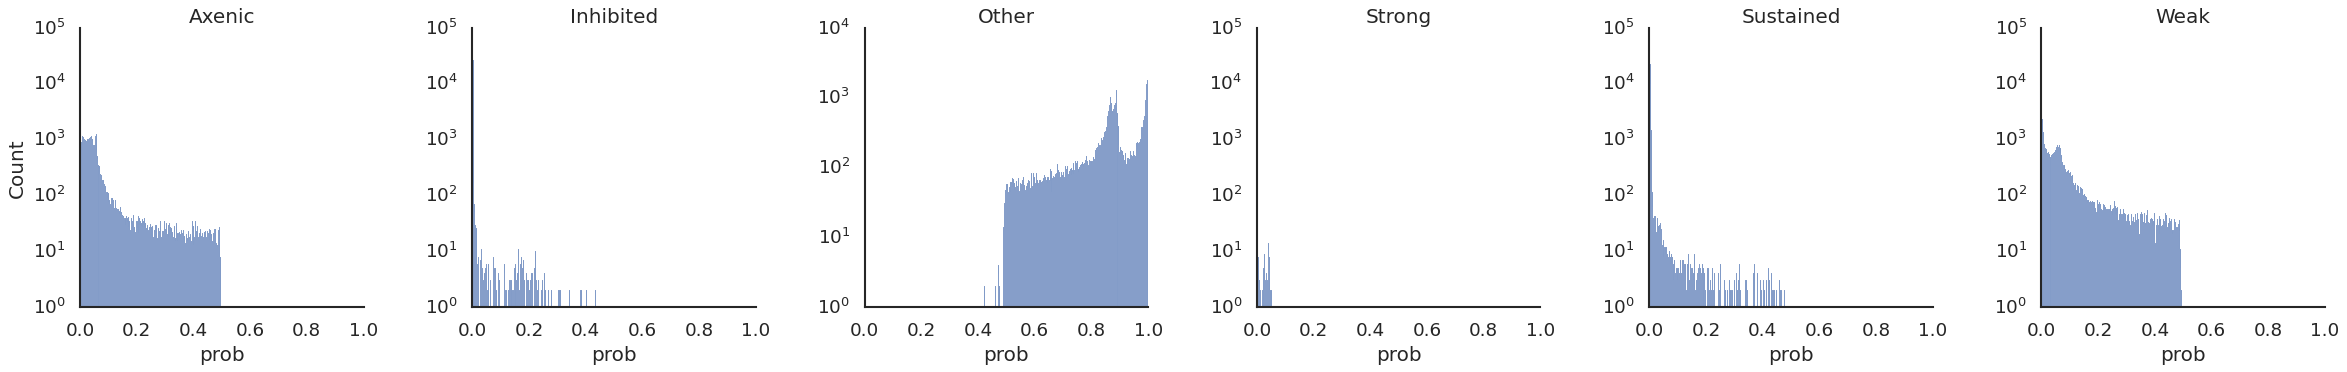

In [187]:
mdf_predicted_prob = df_predicted_prob.melt(
    id_vars=['run_id','y_pred', 'max_prob'], 
    value_vars=stack.classes_, 
    value_name='prob', var_name='Group')
g = sns.displot(
    data=mdf_predicted_prob.loc[mdf_predicted_prob.y_pred.isin(['Other'])], # & mdf_predicted_prob.max_prob.le(0.5)],
    x='prob', 
    col='Group', #col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
g.set(yscale='log')

In [188]:
df_predicted_classes = pd.DataFrame({
    'run_id' : X_sim.index,
    'y_pred' : y_sim_pred,
    'max_prob' : max_sim_prob,
})
df_predicted_classes

,run_id,y_pred,max_prob
0,monte3_EXOENZYME_100_monte_shgo3_sobol_151_EXO...,Axenic,0.797270
1,monte3_EXOENZYME_100_monte_shgo3_sobol_163_EXO...,Other,0.986509
2,monte3_EXOENZYME_100_monte_shgo3_sobol_163_EXO...,Other,0.868453
3,monte3_EXOENZYME_100_monte_shgo3_sobol_199_EXO...,Other,0.863919
4,monte3_EXOENZYME_100_monte_shgo3_sobol_199_EXO...,Other,0.787651
...,...,...,...
122455,monte_ROS_9_monte_vpro_4386_ROS_1_lowN_all_ROS...,Other,0.552056
122456,monte_ROS_9_monte_vpro_4386_ROS_3_lowN_all_ROS...,Other,0.814095
122457,monte_ROS_9_monte_vpro_4511_ROS_0_lowN_all_ROS...,Axenic,0.707792
122458,monte_ROS_9_monte_vpro_4901_ROS_5_lowN_all_ROS...,Weak,0.633817


In [189]:
df_predicted_classes[['idx', 'media', 'which', 'model', 'hash']] = df_predicted_classes.run_id.str.rsplit('_', n=4, expand=True)


In [190]:
class_meta_df  = refdf[['id', 'full name', 'Group']].value_counts().reset_index()

In [191]:
df_predicted_classes

,run_id,y_pred,max_prob,idx,media,which,model,hash
0,monte3_EXOENZYME_100_monte_shgo3_sobol_151_EXO...,Axenic,0.797270,monte3_EXOENZYME_100_monte_shgo3_sobol_151_EXO...,lowN,all,EXOENZYME,h1628948357718170805
1,monte3_EXOENZYME_100_monte_shgo3_sobol_163_EXO...,Other,0.986509,monte3_EXOENZYME_100_monte_shgo3_sobol_163_EXO...,lowN,all,EXOENZYME,h1628948357718170805
2,monte3_EXOENZYME_100_monte_shgo3_sobol_163_EXO...,Other,0.868453,monte3_EXOENZYME_100_monte_shgo3_sobol_163_EXO...,lowN,all,EXOENZYME,h1628948357718170805
3,monte3_EXOENZYME_100_monte_shgo3_sobol_199_EXO...,Other,0.863919,monte3_EXOENZYME_100_monte_shgo3_sobol_199_EXO...,lowN,all,EXOENZYME,h1628948357718170805
4,monte3_EXOENZYME_100_monte_shgo3_sobol_199_EXO...,Other,0.787651,monte3_EXOENZYME_100_monte_shgo3_sobol_199_EXO...,lowN,all,EXOENZYME,h1628948357718170805
...,...,...,...,...,...,...,...,...
122455,monte_ROS_9_monte_vpro_4386_ROS_1_lowN_all_ROS...,Other,0.552056,monte_ROS_9_monte_vpro_4386_ROS_1,lowN,all,ROS,h5853139000967720769
122456,monte_ROS_9_monte_vpro_4386_ROS_3_lowN_all_ROS...,Other,0.814095,monte_ROS_9_monte_vpro_4386_ROS_3,lowN,all,ROS,h5853139000967720769
122457,monte_ROS_9_monte_vpro_4511_ROS_0_lowN_all_ROS...,Axenic,0.707792,monte_ROS_9_monte_vpro_4511_ROS_0,lowN,all,ROS,h5853139000967720769
122458,monte_ROS_9_monte_vpro_4901_ROS_5_lowN_all_ROS...,Weak,0.633817,monte_ROS_9_monte_vpro_4901_ROS_5,lowN,all,ROS,h5853139000967720769


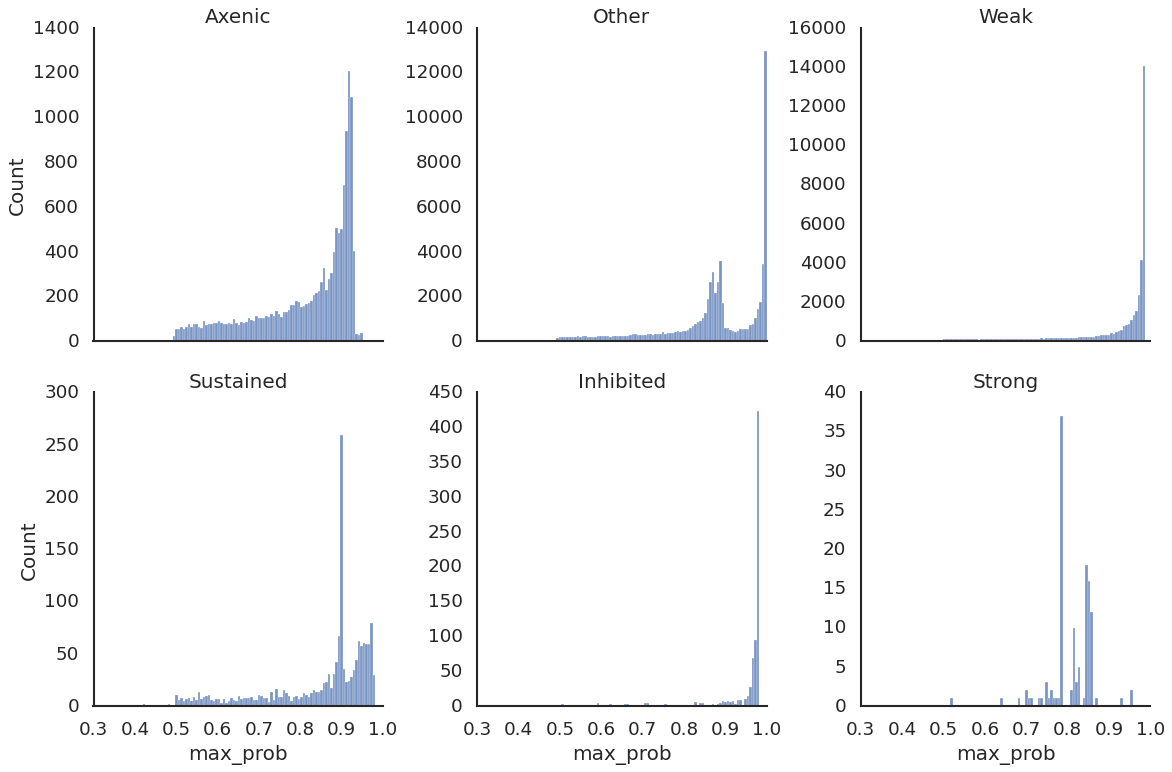

In [192]:
g = sns.displot(
    data=df_predicted_classes,
    x='max_prob', 
    col='y_pred', col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
#g.set(yscale='log')

In [193]:
df_predicted_classes.y_pred.value_counts()

Other        66002
Weak         39848
Axenic       14076
Sustained     1611
Inhibited      797
Strong         126
Name: y_pred, dtype: int64

In [194]:
np.unique(y_test, return_counts=True)

(array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
       dtype=object),
 array([ 18,  36, 808,  18,   6,   6]))

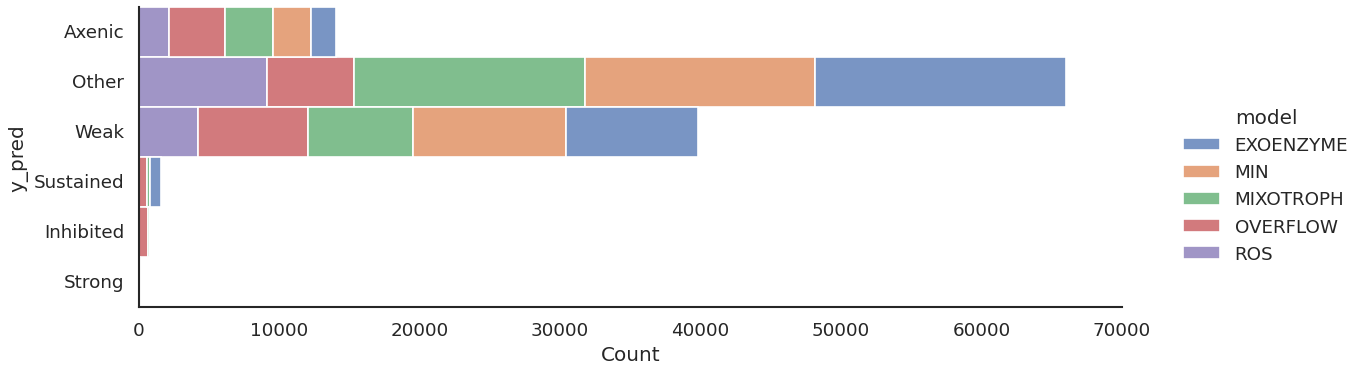

In [195]:
g = sns.displot(
    data=df_predicted_classes.reset_index(),
    #x='max_prob', 
    y='y_pred', hue='model', #dodge=False,
    #kind='count',
    multiple='stack',
    #legend=False,
    aspect=3,
)
#g.set_titles(col_template='{col_name}')
# g.set(xscale='log')

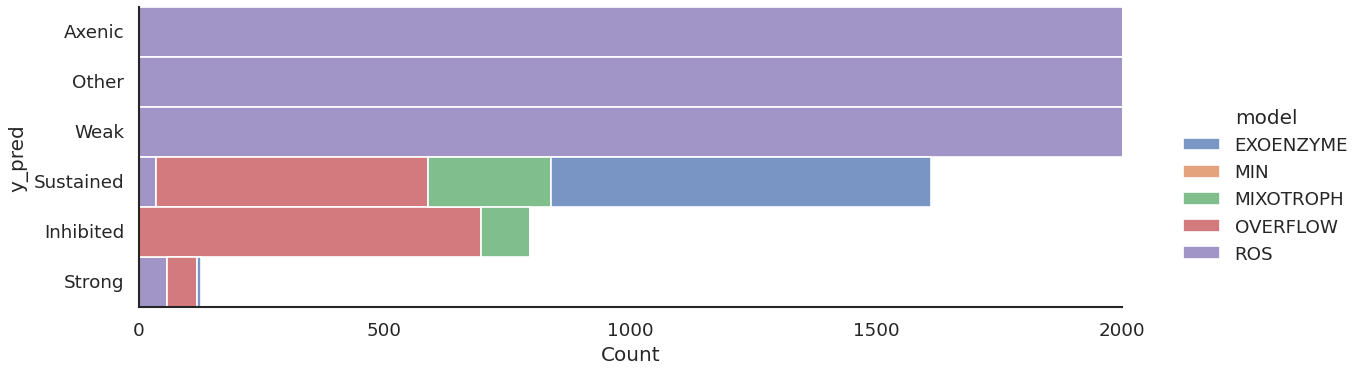

In [216]:
g = sns.displot(
    data=df_predicted_classes.reset_index(),
    #x='max_prob', 
    y='y_pred', hue='model', #dodge=False,
    #kind='count',
    multiple='stack',
    #legend=False,
    aspect=3,
)
#g.set_titles(col_template='{col_name}')
g.set(xlim=(0,2000))

In [197]:
sample_ids = df_predicted_classes.groupby('y_pred').run_id.sample(50, replace=True)

In [198]:
sample_df = sim_df.loc[sim_df.run_id.isin(sample_ids)]
sample_df = sample_df.merge(df_predicted_classes, on='run_id', how='left')
sample_df

,run_id,day,ref_Bp[N],ref_Bp[C],y_pred,max_prob,idx,media,which,model,hash
0,monte4_EXOENZYME_62_monte_vpro_4639_EXOENZYME_...,0.000000,0.000000,0.771968,Sustained,0.837936,monte4_EXOENZYME_62_monte_vpro_4639_EXOENZYME_99,lowN,all,EXOENZYME,h1628948357718170805
1,monte4_EXOENZYME_62_monte_vpro_4639_EXOENZYME_...,1.081944,0.669685,1.414500,Sustained,0.837936,monte4_EXOENZYME_62_monte_vpro_4639_EXOENZYME_99,lowN,all,EXOENZYME,h1628948357718170805
2,monte4_EXOENZYME_62_monte_vpro_4639_EXOENZYME_...,2.164583,1.266935,2.011760,Sustained,0.837936,monte4_EXOENZYME_62_monte_vpro_4639_EXOENZYME_99,lowN,all,EXOENZYME,h1628948357718170805
3,monte4_EXOENZYME_62_monte_vpro_4639_EXOENZYME_...,2.747222,1.588241,2.333115,Sustained,0.837936,monte4_EXOENZYME_62_monte_vpro_4639_EXOENZYME_99,lowN,all,EXOENZYME,h1628948357718170805
4,monte4_EXOENZYME_62_monte_vpro_4639_EXOENZYME_...,3.754167,1.836930,2.762750,Sustained,0.837936,monte4_EXOENZYME_62_monte_vpro_4639_EXOENZYME_99,lowN,all,EXOENZYME,h1628948357718170805
...,...,...,...,...,...,...,...,...,...,...,...
21159,monte3_ROS_96_monte_shgo4_sobol_928_ROS_69_low...,110.943750,0.313481,1.310063,Strong,0.852360,monte3_ROS_96_monte_shgo4_sobol_928_ROS_69,lowN,all,ROS,h5853139000967720769
21160,monte3_ROS_96_monte_shgo4_sobol_928_ROS_69_low...,115.845833,0.237070,1.233652,Strong,0.852360,monte3_ROS_96_monte_shgo4_sobol_928_ROS_69,lowN,all,ROS,h5853139000967720769
21161,monte3_ROS_96_monte_shgo4_sobol_928_ROS_69_low...,118.788889,0.191196,1.187777,Strong,0.852360,monte3_ROS_96_monte_shgo4_sobol_928_ROS_69,lowN,all,ROS,h5853139000967720769
21162,monte3_ROS_96_monte_shgo4_sobol_928_ROS_69_low...,121.777778,0.144607,1.141189,Strong,0.852360,monte3_ROS_96_monte_shgo4_sobol_928_ROS_69,lowN,all,ROS,h5853139000967720769


In [199]:
refdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,...,ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted,train_Group,log_Nbiomass,log_Cbiomass
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,...,9.476845,10CC,NaN,NaN,NaN,NaN,NaN,Weak,0.155478,0.976664
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,...,13.671514,10CC,NaN,NaN,NaN,NaN,NaN,Weak,0.314631,1.135817
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,...,18.798332,10CC,NaN,NaN,NaN,NaN,NaN,Weak,0.452933,1.274119
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,...,29.362685,10CC,NaN,NaN,NaN,NaN,NaN,Weak,0.646610,1.467796
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,...,42.723483,10CC,NaN,NaN,NaN,NaN,NaN,Weak,0.809481,1.630667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56940,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,6917400.0,80.062500,...,0.776791,Axenic_media,NaN,NaN,ctrl,lowP(1:50),131321.579908,Other,0.000000,0.000000
56941,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7251600.0,83.930556,...,-0.776791,Axenic_media,NaN,NaN,ctrl,lowP(1:50),-131321.579908,Other,0.000000,0.000000
56942,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7412820.0,85.796528,...,1.553581,Axenic_media,NaN,NaN,ctrl,lowP(1:50),262643.159815,Other,0.000000,0.191334
56943,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7942080.0,91.922222,...,5.903609,Axenic_media,NaN,NaN,ctrl,lowP(1:50),998044.007298,Other,0.000000,0.771118


In [200]:
refdf = add_log_cols(refdf, 'ref_Bp')

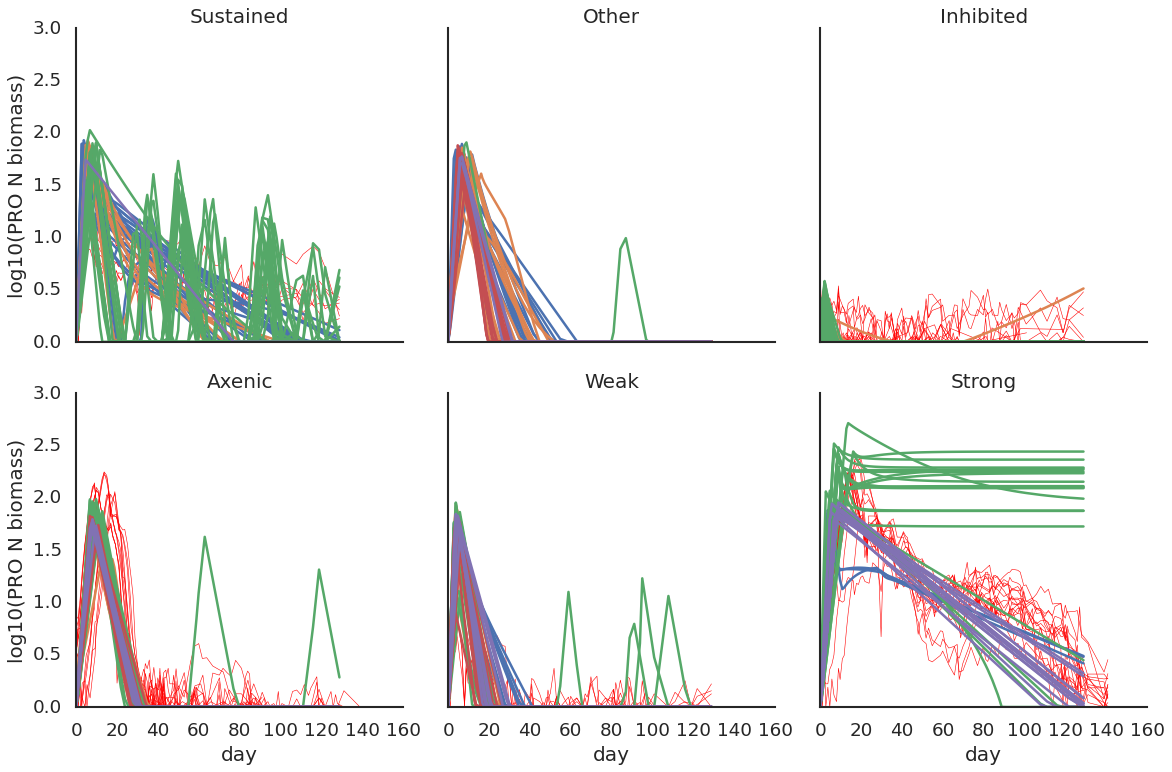

In [201]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        hue='model',
        x='day', y=f'ref_Bp[N]', 
        col='y_pred', col_wrap=3,
        #facet_kws=dict( margin_titles=True),
        legend=False
    )
    for (col_val), ax in g.axes_dict.items():
        if col_val != 'Other':
            sns.lineplot(
                data=refdf.loc[refdf['train_Group'].isin([col_val])],
                x='day', y='log_Nbiomass',
            units='Sample', estimator=None, ax=ax, lw=0.5, color='red',
                zorder=-1,

                         legend=False
                        )
    g.set(ylabel='log10(PRO N biomass)')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

In [202]:
class_meta_df

,id,full name,Group,0
0,all_all,Axenic,Other,1338
1,MED4_DE,A. mediterranea AltDE,Strong,1338
2,MED4_DE1,A. mediterranea AltDE1,Strong,1338
3,MED4_1A3,A. macleodii HOT1A3,Strong,1208
4,MED4_BS11,A. macleodii BS11,Strong,1129
...,...,...,...,...
103,SB_lowP(1:50),Axenic_SB_lowP(1:50),Axenic_Other,156
104,SB_lowP(1:8),Axenic_SB_lowP(1:8),Axenic_Other,156
105,9202_lowP(1:8),Axenic_9202_lowP(1:8),Axenic_Other,156
106,9202_lowP(1:50),Axenic_9202_lowP(1:50),Axenic_Other,156


In [203]:
list(zip(*np.unique(y_sim_pred, return_counts=True)))

[('Axenic', 14076),
 ('Inhibited', 797),
 ('Other', 66002),
 ('Strong', 126),
 ('Sustained', 1611),
 ('Weak', 39848)]

In [204]:
stack.classes_

array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
      dtype=object)

In [205]:
refdf[['id', 'Group']].value_counts()

id               Group       
all_all          Other           1338
MED4_DE          Strong          1338
MED4_DE1         Strong          1338
MED4_1A3         Strong          1208
MED4_BS11        Strong          1129
                                 ... 
SB_lowP(1:50)    Axenic_Other     156
SB_lowP(1:8)     Axenic_Other     156
9202_lowP(1:8)   Axenic_Other     156
9202_lowP(1:50)  Axenic_Other     156
MIT0604_Ax_Pro   Axenic_Other      88
Length: 108, dtype: int64

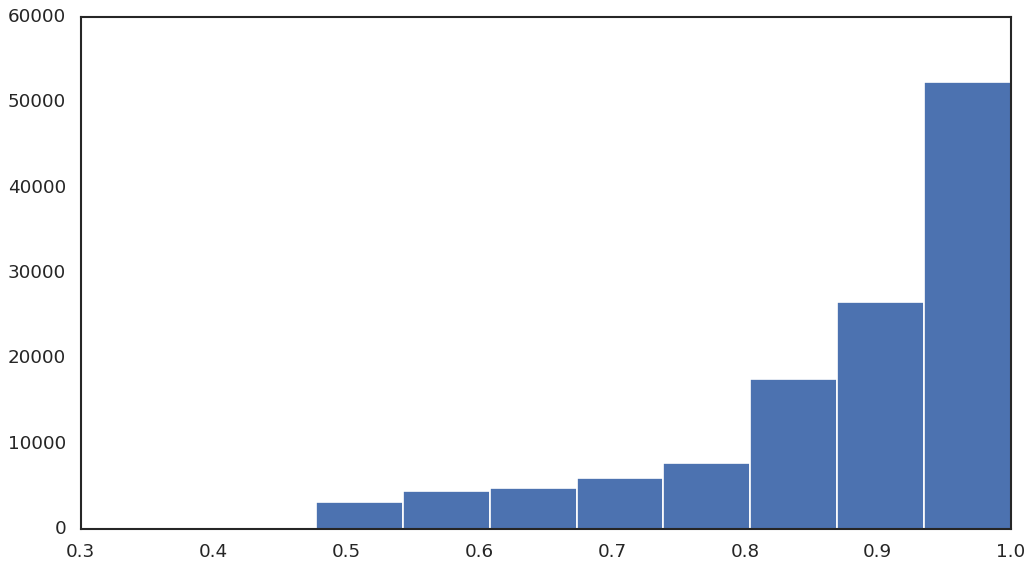

In [206]:
plt.hist(max_sim_prob)  
plt.show()

In [207]:
max_sim_prob.shape

(122460,)

In [208]:
df_predicted_classes.to_csv('monte_predicted_classes.csv.gz', index=False)

In [209]:
X_sim.shape, df_predicted_classes.shape

((122460, 138), (122460, 8))

In [210]:
df_predicted_classes.run_id.value_counts()

monte3_EXOENZYME_100_monte_shgo3_sobol_151_EXOENZYME_5_lowN_all_EXOENZYME_h1628948357718170805    1
monte_EXOENZYME_24_monte_vpro_3288_EXOENZYME_64_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3439_EXOENZYME_17_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3367_EXOENZYME_89_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3359_EXOENZYME_77_lowN_all_EXOENZYME_h1628948357718170805           1
                                                                                                 ..
monte4_EXOENZYME_40_monte_vpro_428_EXOENZYME_35_lowN_all_EXOENZYME_h1628948357718170805           1
monte4_EXOENZYME_40_monte_vpro_4244_EXOENZYME_1_lowN_all_EXOENZYME_h1628948357718170805           1
monte4_EXOENZYME_40_monte_vpro_4212_EXOENZYME_70_lowN_all_EXOENZYME_h1628948357718170805          1
monte4_EXOENZYME_40_monte_vpro_4212_EXOENZYME_65_lowN_all_EXOENZYME_h1628948357718170805          1


In [211]:
X_sim.index.value_counts()

monte3_EXOENZYME_100_monte_shgo3_sobol_151_EXOENZYME_5_lowN_all_EXOENZYME_h1628948357718170805    1
monte_EXOENZYME_24_monte_vpro_3288_EXOENZYME_64_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3439_EXOENZYME_17_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3367_EXOENZYME_89_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3359_EXOENZYME_77_lowN_all_EXOENZYME_h1628948357718170805           1
                                                                                                 ..
monte4_EXOENZYME_40_monte_vpro_428_EXOENZYME_35_lowN_all_EXOENZYME_h1628948357718170805           1
monte4_EXOENZYME_40_monte_vpro_4244_EXOENZYME_1_lowN_all_EXOENZYME_h1628948357718170805           1
monte4_EXOENZYME_40_monte_vpro_4212_EXOENZYME_70_lowN_all_EXOENZYME_h1628948357718170805          1
monte4_EXOENZYME_40_monte_vpro_4212_EXOENZYME_65_lowN_all_EXOENZYME_h1628948357718170805          1


In [212]:
psim_feature_df.index.value_counts()

monte3_EXOENZYME_100_monte_shgo3_sobol_151_EXOENZYME_5_lowN_all_EXOENZYME_h1628948357718170805    1
monte_EXOENZYME_24_monte_vpro_3288_EXOENZYME_64_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3439_EXOENZYME_17_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3367_EXOENZYME_89_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3359_EXOENZYME_77_lowN_all_EXOENZYME_h1628948357718170805           1
                                                                                                 ..
monte4_EXOENZYME_40_monte_vpro_428_EXOENZYME_35_lowN_all_EXOENZYME_h1628948357718170805           1
monte4_EXOENZYME_40_monte_vpro_4244_EXOENZYME_1_lowN_all_EXOENZYME_h1628948357718170805           1
monte4_EXOENZYME_40_monte_vpro_4212_EXOENZYME_70_lowN_all_EXOENZYME_h1628948357718170805          1
monte4_EXOENZYME_40_monte_vpro_4212_EXOENZYME_65_lowN_all_EXOENZYME_h1628948357718170805          1


In [213]:
tmp = sim_df_filtered.pivot_table(index='run_id', values=['ref_Bp[N]', 'ref_Bp[C]'],columns='day')
tmp.index.value_counts()

monte3_EXOENZYME_100_monte_shgo3_sobol_151_EXOENZYME_5_lowN_all_EXOENZYME_h1628948357718170805    1
monte_EXOENZYME_24_monte_vpro_3288_EXOENZYME_64_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3439_EXOENZYME_17_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3367_EXOENZYME_89_lowN_all_EXOENZYME_h1628948357718170805           1
monte_EXOENZYME_24_monte_vpro_3359_EXOENZYME_77_lowN_all_EXOENZYME_h1628948357718170805           1
                                                                                                 ..
monte4_EXOENZYME_40_monte_vpro_428_EXOENZYME_35_lowN_all_EXOENZYME_h1628948357718170805           1
monte4_EXOENZYME_40_monte_vpro_4244_EXOENZYME_1_lowN_all_EXOENZYME_h1628948357718170805           1
monte4_EXOENZYME_40_monte_vpro_4212_EXOENZYME_70_lowN_all_EXOENZYME_h1628948357718170805          1
monte4_EXOENZYME_40_monte_vpro_4212_EXOENZYME_65_lowN_all_EXOENZYME_h1628948357718170805          1


In [153]:
X_train.index.value_counts()

0       1
3183    1
3181    1
3180    1
3179    1
       ..
1588    1
1587    1
1586    1
1585    1
4764    1
Name: smt_id, Length: 4765, dtype: int64